## Loan Status Prediction : Team 19 RegEx Softwares
***

**General Idea:** Finance company deals in all types loans like, Home Purchase, Home Improvement, Debt Consolidation, Business Loan, Car Loan, Medical Bills, Take a Trip, Wedding, Vacation, Educational Expenses and many others. They have presence across all urban, semi urban and rural areas.

The Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

It’s a classification problem , given information about the application we have to predict whether the they’ll be to pay the loan or not. We’ll start by exploratory data analysis , then preprocessing , and finally we’ll be testing different models such as Logistic regression, boosting algorithms and bagging algorithms.

The data consists of the following rows:
`Loan ID`,	`Customer ID`,	`Loan Status`,	`Current Loan Amount`,	`Term`,	`Credit Score`,	`Annual Income`,	`Years in current job`,	`Home Ownership`,	`Purpose`,	`Monthly Debt`,	`Years of Credit History`,	`Months since last delinquent`,	`Number of Open Accounts`,	`Number of Credit Problems`,	`Current Credit Balance`,	`Maximum Open Credit`,	`Bankruptcies`,	`Tax Liens`.

**Problem Statement:** The data is given by the Mentor Mr. Tuhin. The data is associted with Loan Status of a customer and some other features which are essential to this domain. We have to study the historical data and then we have to create a model which will predict the `Loan Status` with help of other independent features of the data.

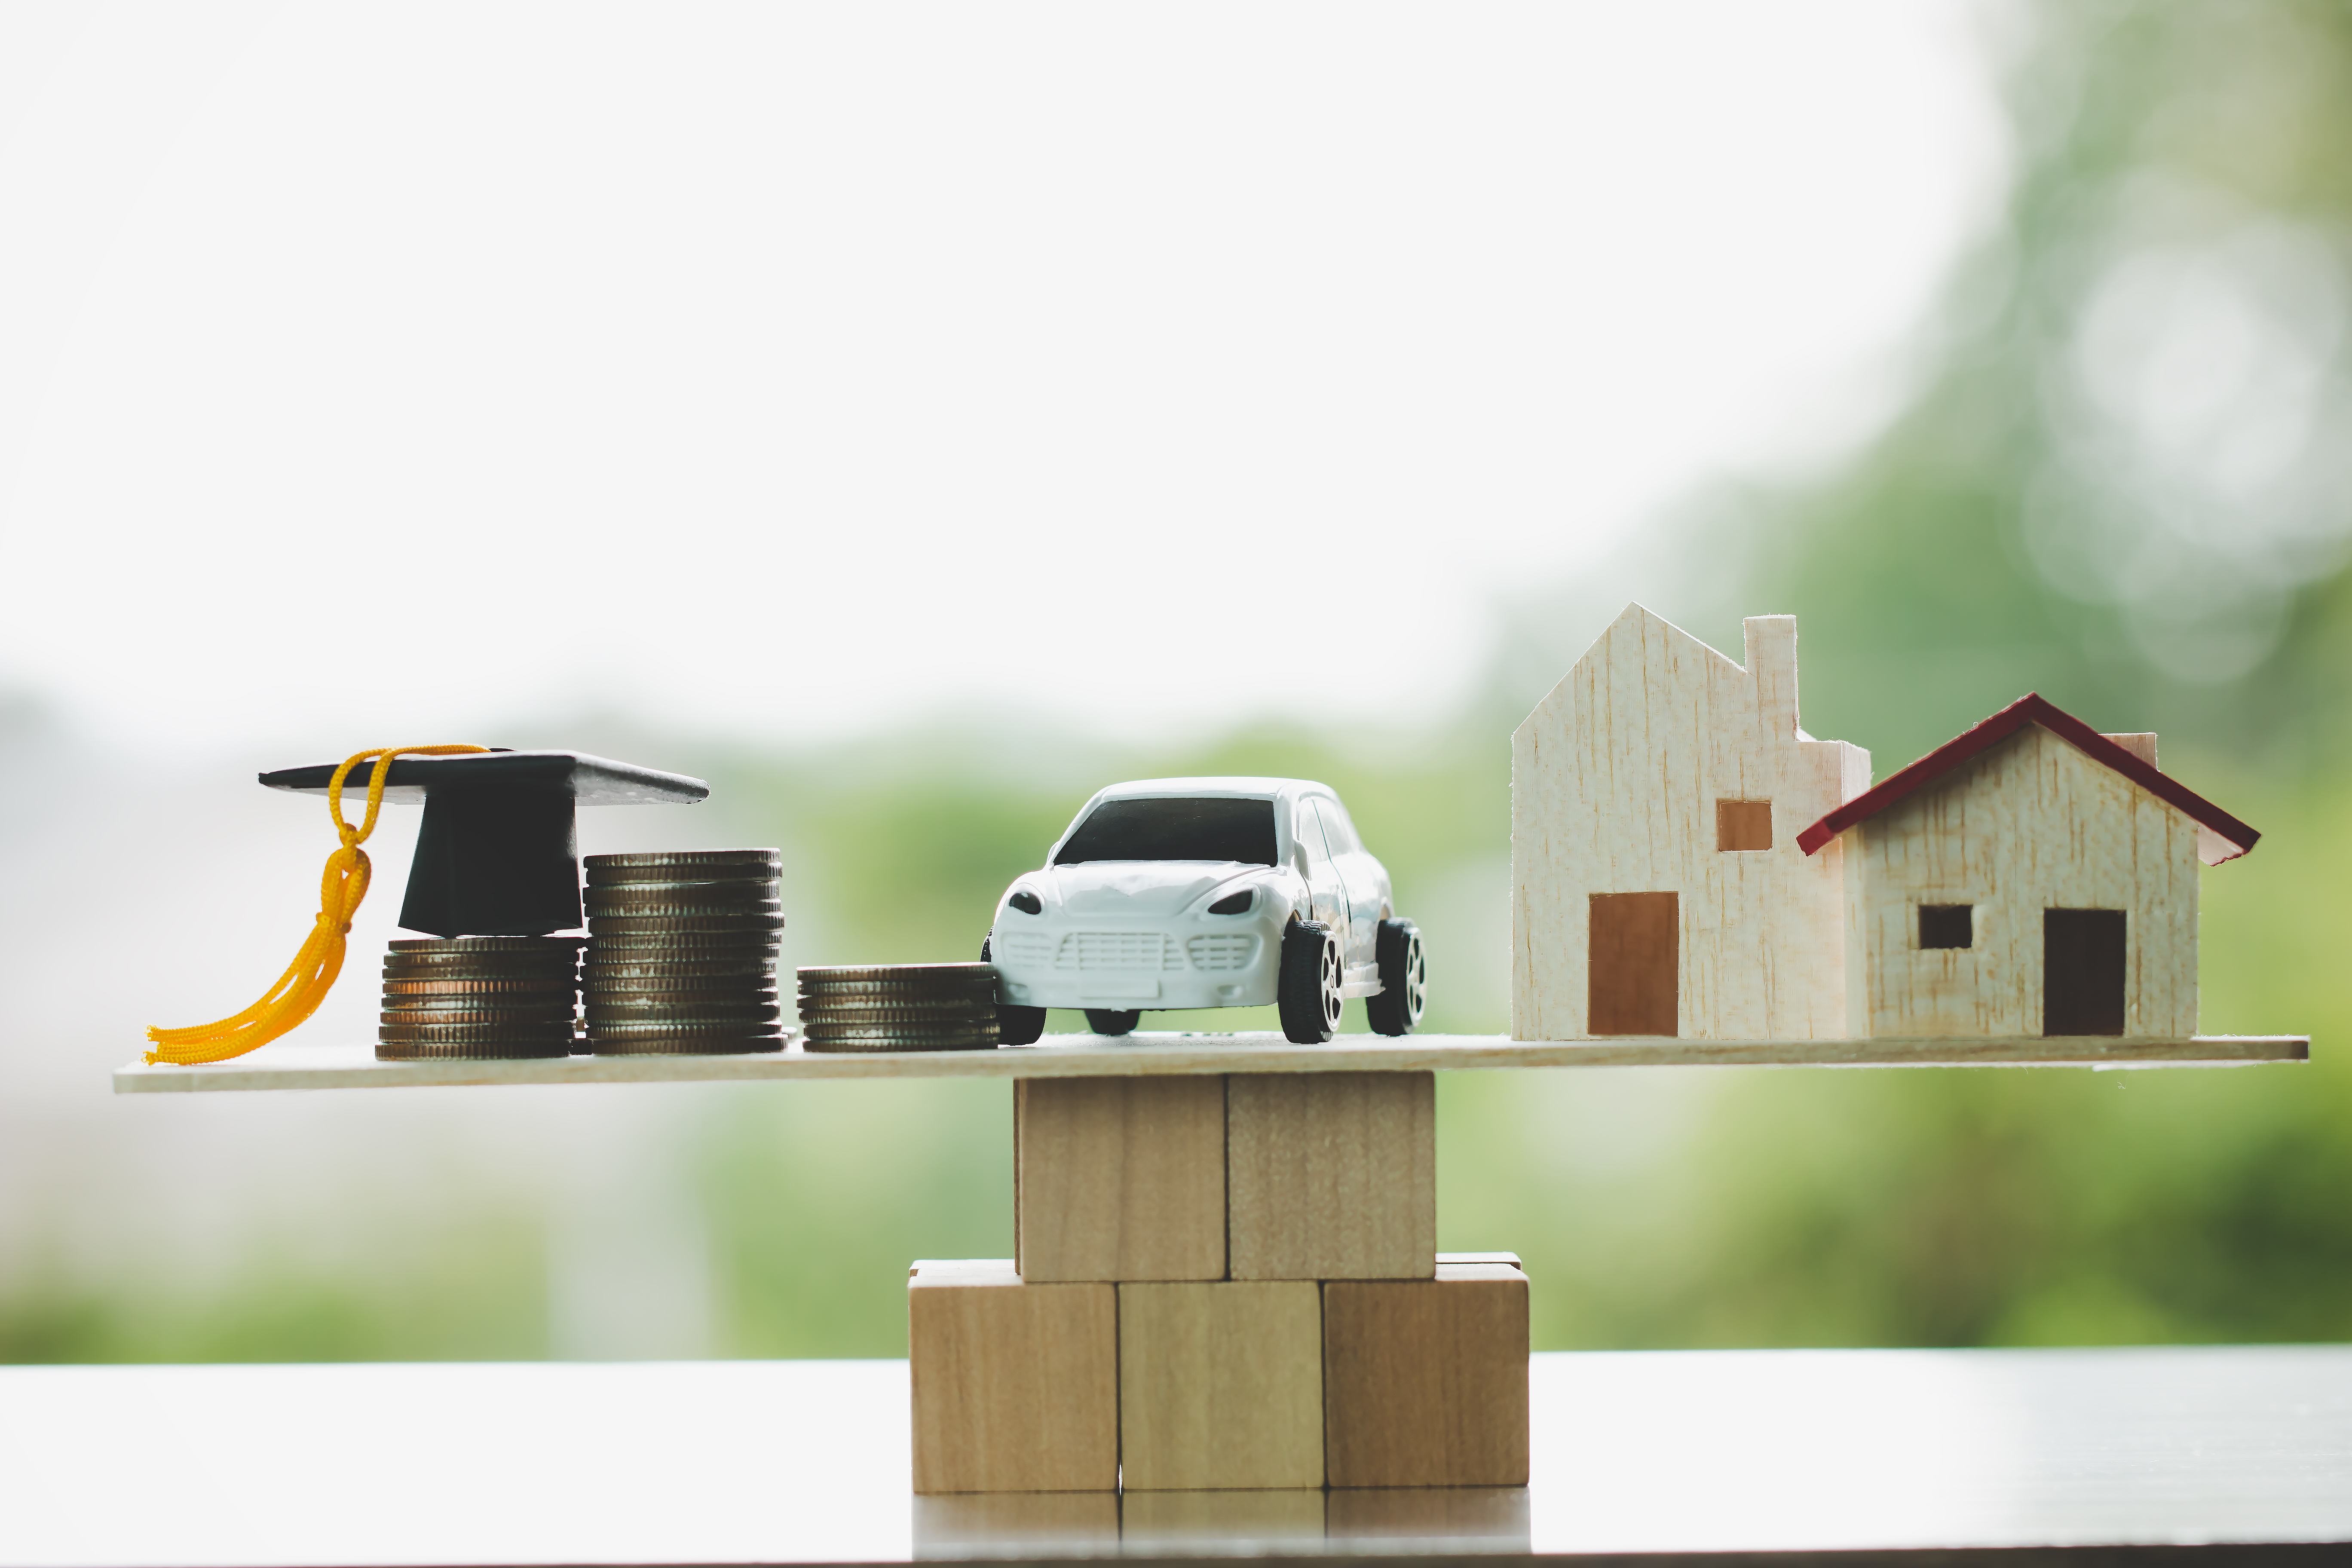

In [1]:
from IPython.display import Image
Image(filename='house-car-graduation-cap-wooden-block-concept-educate-graduate.jpg',width=1000,height=50)

### Essential Libraries
****
These are all essential libraries for the scientific computing, visualisation, algorithms, scaling, evaluations and warnings.

In [2]:
# scientific computing libraries
import pandas as pd
import numpy as np
from scipy import optimize, stats  
from scipy.stats import norm, skew
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 8)
plt.style.use('ggplot')

# algorithmic library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

# scaling libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, PowerTransformer

# evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# warnings
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset
****
There are two datasets given, one is for training and another is for testing i.e. validation. The validation dataset will be used for checking how much model is reliable and how is its performance of prediction.

In [3]:
credit_train = pd.read_csv('credit_train.csv')
credit_test = pd.read_csv('credit_test.csv')

In [4]:
credit_train.head()

Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

  Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0  Fully Paid             445412.0  Short Term         709.0      1167493.0   
1  Fully Paid             262328.0  Short Term           NaN            NaN   
2  Fully Paid           99999999.0  Short Term         741.0      2231892.0   
3  Fully Paid             347666.0   Long Term         721.0       806949.0   
4  Fully Paid             176220.0  Short Term           NaN            NaN   

  Years in current job Home Ownership             Purpose  Monthly Debt  \
0              8 years  Home Mortgage   Home Improvements       5214.74   
1            10+ years  Home Mortgage  Debt Consolidation      33295.98   
2              8 years       Own Home  Debt Consolidation      29200.53   
3              3 years       Own Home  Debt Consolidation       8741.90   
4              5 years           Rent  Debt Consolidation      20639.70   

   Years of Credit History  Months since last delinquent  \
0                     17.2                           NaN   
1                     21.1                           8.0   
2                     14.9                          29.0   
3                     12.0                           NaN   
4                      6.1                           NaN   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                      6.0                        1.0                228190.0   
1                     35.0                        0.0                229976.0   
2                     18.0                        1.0                297996.0   
3                      9.0                        0.0                256329.0   
4                     15.0                        0.0                253460.0   

   Maximum Open Credit  Bankruptcies  Tax Liens  
0             416746.0           1.0        0.0  
1             850784.0           0.0        0.0  
2             750090.0           0.0        0.0  
3             386958.0           0.0        0.0  
4             427174.0           0.0        0.0

In [5]:
credit_train.shape

(100514, 19)

In the training dataset, there are 100514 rows in the data and 19 columns from which 1 feature must be a target feature.

In [6]:
credit_test.head()

Loan ID                           Customer ID  \
0  f738779f-c726-40dc-92cf-689d73af533d  ded0b3c3-6bf4-4091-8726-47039f2c1b90   
1  6dcc0947-164d-476c-a1de-3ae7283dde0a  1630e6e3-34e3-461a-8fda-09297d3140c8   
2  f7744d01-894b-49c3-8777-fc6431a2cff1  2c60938b-ad2b-4702-804d-eeca43949c52   
3  83721ffb-b99a-4a0f-aea5-ef472a138b41  12116614-2f3c-4d16-ad34-d92883718806   
4  08f3789f-5714-4b10-929d-e1527ab5e5a3  39888105-fd5f-4023-860a-30a3e6f5ccb7   

   Current Loan Amount        Term  Credit Score  Annual Income  \
0             611314.0  Short Term         747.0      2074116.0   
1             266662.0  Short Term         734.0      1919190.0   
2             153494.0  Short Term         709.0       871112.0   
3             176242.0  Short Term         727.0       780083.0   
4             321992.0  Short Term         744.0      1761148.0   

  Years in current job Home Ownership             Purpose  Monthly Debt  \
0            10+ years  Home Mortgage  Debt Consolidation      42000.83   
1            10+ years  Home Mortgage  Debt Consolidation      36624.40   
2              2 years           Rent  Debt Consolidation       8391.73   
3            10+ years           Rent  Debt Consolidation      16771.87   
4            10+ years  Home Mortgage  Debt Consolidation      39478.77   

   Years of Credit History  Months since last delinquent  \
0                     21.8                           NaN   
1                     19.4                           NaN   
2                     12.5                          10.0   
3                     16.5                          27.0   
4                     26.0                          44.0   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                      9.0                        0.0                621908.0   
1                     11.0                        0.0                679573.0   
2                     10.0                        0.0                 38532.0   
3                     16.0                        1.0                156940.0   
4                     14.0                        0.0                359765.0   

   Maximum Open Credit  Bankruptcies  Tax Liens  
0            1058970.0           0.0        0.0  
1             904442.0           0.0        0.0  
2             388036.0           0.0        0.0  
3             531322.0           1.0        0.0  
4             468072.0           0.0        0.0

In [7]:
credit_test.shape

(10353, 18)

In the validation dataset, there are 10353 rows in the data and 18 columns, in this target feature is not their we have to predict the target colun with the model built on our training dataset.

### Submission File

In [8]:
df_submission = pd.DataFrame()
df_submission['Load ID'] = credit_test['Loan ID']

### Dropping some insignificant columns
***
Columns like `Loan ID` and `Customer ID` will never add any value to our model so, we drop in the primary stages only.

In [9]:
credit_train.drop(['Loan ID','Customer ID'],axis=1,inplace=True)
credit_test.drop(['Loan ID','Customer ID'],axis=1,inplace=True)

### Looking at info of data
***
This will give us general idea about the datasets, that what are all columns are there, are there any missing values or not, what is the data type of features, rows and column, memory usage.

In [10]:
credit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   100000 non-null  object 
 1   Current Loan Amount           100000 non-null  float64
 2   Term                          100000 non-null  object 
 3   Credit Score                  80846 non-null   float64
 4   Annual Income                 80846 non-null   float64
 5   Years in current job          95778 non-null   object 
 6   Home Ownership                100000 non-null  object 
 7   Purpose                       100000 non-null  object 
 8   Monthly Debt                  100000 non-null  float64
 9   Years of Credit History       100000 non-null  float64
 10  Months since last delinquent  46859 non-null   float64
 11  Number of Open Accounts       100000 non-null  float64
 12  Number of Credit Problems     100000 non-nul

In [11]:
credit_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10353 entries, 0 to 10352
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           10000 non-null  float64
 1   Term                          10000 non-null  object 
 2   Credit Score                  8019 non-null   float64
 3   Annual Income                 8019 non-null   float64
 4   Years in current job          9573 non-null   object 
 5   Home Ownership                10000 non-null  object 
 6   Purpose                       10000 non-null  object 
 7   Monthly Debt                  10000 non-null  float64
 8   Years of Credit History       10000 non-null  float64
 9   Months since last delinquent  4694 non-null   float64
 10  Number of Open Accounts       10000 non-null  float64
 11  Number of Credit Problems     10000 non-null  float64
 12  Current Credit Balance        10000 non-null  float64
 13  M

### Five point summary of data
***
Five point summary is famous method to take a look at 5 basic concept of statistics with respest to our data. They are count, mean, standard deviation, minimum value, maximum value and quantiles of each feature.

In [12]:
credit_train.describe()

Current Loan Amount  Credit Score  Annual Income   Monthly Debt  \
count         1.000000e+05  80846.000000   8.084600e+04  100000.000000   
mean          1.176045e+07   1076.456089   1.378277e+06   18472.412336   
std           3.178394e+07   1475.403791   1.081360e+06   12174.992609   
min           1.080200e+04    585.000000   7.662700e+04       0.000000   
25%           1.796520e+05    705.000000   8.488440e+05   10214.162500   
50%           3.122460e+05    724.000000   1.174162e+06   16220.300000   
75%           5.249420e+05    741.000000   1.650663e+06   24012.057500   
max           1.000000e+08   7510.000000   1.655574e+08  435843.280000   

       Years of Credit History  Months since last delinquent  \
count            100000.000000                  46859.000000   
mean                 18.199141                     34.901321   
std                   7.015324                     21.997829   
min                   3.600000                      0.000000   
25%                  13.500000                     16.000000   
50%                  16.900000                     32.000000   
75%                  21.700000                     51.000000   
max                  70.500000                    176.000000   

       Number of Open Accounts  Number of Credit Problems  \
count             100000.00000              100000.000000   
mean                  11.12853                   0.168310   
std                    5.00987                   0.482705   
min                    0.00000                   0.000000   
25%                    8.00000                   0.000000   
50%                   10.00000                   0.000000   
75%                   14.00000                   0.000000   
max                   76.00000                  15.000000   

       Current Credit Balance  Maximum Open Credit  Bankruptcies     Tax Liens  
count            1.000000e+05         9.999800e+04  99796.000000  99990.000000  
mean             2.946374e+05         7.607984e+05      0.117740      0.029313  
std              3.761709e+05         8.384503e+06      0.351424      0.258182  
min              0.000000e+00         0.000000e+00      0.000000      0.000000  
25%              1.126700e+05         2.734380e+05      0.000000      0.000000  
50%              2.098170e+05         4.678740e+05      0.000000      0.000000  
75%              3.679588e+05         7.829580e+05      0.000000      0.000000  
max              3.287897e+07         1.539738e+09      7.000000     15.000000

In [13]:
credit_test.describe()

Current Loan Amount  Credit Score  Annual Income   Monthly Debt  \
count         1.000000e+04   8019.000000   8.019000e+03   10000.000000   
mean          1.160380e+07   1077.991520   1.369106e+06   18429.671699   
std           3.160010e+07   1477.467761   8.687557e+05   12399.956192   
min           1.947000e+04    585.000000   8.109200e+04       0.000000   
25%           1.789480e+05    706.000000   8.483405e+05   10202.857500   
50%           3.092760e+05    725.000000   1.168272e+06   16052.055000   
75%           5.157075e+05    741.000000   1.664390e+06   23881.337500   
max           1.000000e+08   7510.000000   1.781535e+07  229057.920000   

       Years of Credit History  Months since last delinquent  \
count             10000.000000                   4694.000000   
mean                 18.235930                     34.964636   
std                   7.018356                     21.640291   
min                   3.800000                      0.000000   
25%                  13.600000                     17.000000   
50%                  17.000000                     32.000000   
75%                  21.700000                     50.000000   
max                  62.500000                    131.000000   

       Number of Open Accounts  Number of Credit Problems  \
count              10000.00000               10000.000000   
mean                  11.08410                   0.165500   
std                    5.02338                   0.500934   
min                    1.00000                   0.000000   
25%                    7.00000                   0.000000   
50%                   10.00000                   0.000000   
75%                   14.00000                   0.000000   
max                   55.00000                  10.000000   

       Current Credit Balance  Maximum Open Credit  Bankruptcies    Tax Liens  
count            1.000000e+04         1.000000e+04   9978.000000  9999.000000  
mean             2.907301e+05         6.871308e+05      0.116356     0.030803  
std              3.881687e+05         1.861394e+06      0.349961     0.288215  
min              0.000000e+00         0.000000e+00      0.000000     0.000000  
25%              1.086515e+05         2.706000e+05      0.000000     0.000000  
50%              2.075180e+05         4.626050e+05      0.000000     0.000000  
75%              3.624630e+05         7.861150e+05      0.000000     0.000000  
max              1.623744e+07         1.459073e+08      5.000000     9.000000

### Looking at the missing values
***
I have created a user defined funstion to take a look at the missing values in the data. The dataframes has given background shades of reds to understand the data easily.

In [14]:
def missing_val(df):
    Missing_values=df.isna().sum()
    Percent_missing_values=100*df.isna().sum()/len(df)
    tab=pd.concat([Missing_values,Percent_missing_values.round(2)],axis=1)
    tab.columns=['Missing_values','Percent_missing_values']
    tab=tab[tab['Percent_missing_values']>0].sort_values('Percent_missing_values',ascending=False)
    return(tab.style.background_gradient('Reds'))

missing_val(credit_train)

In [15]:
missing_val(credit_test)

### Visualization
***
The visualizations of correlation matrix (heatmap), distribution of numerical variables, distribution of categorical variables, numerical vs categorical variables, categorical vs categorical variables, pair plot of the data have been shown below.

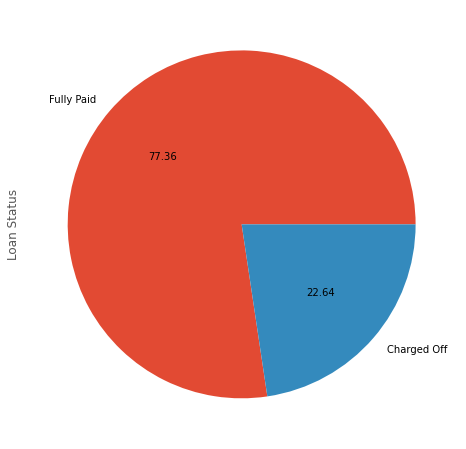

In [16]:
credit_train['Loan Status'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

**Observations:**
- The target column `Loan Status` tells us about customer closed account or not.
- 'Fully Paid' and 'Charged Off' are the two catrgories of target column.
- The data is distributed evenly. This is not an defect. There is no need to be taken or rectify the problem.
- If the data imbalance was found that, minority class having value less than 10% or 5%, at that time we should have done something to rectify it.
- Steps like, over-under sampling, SMOTE, etc.

**Heatmap**

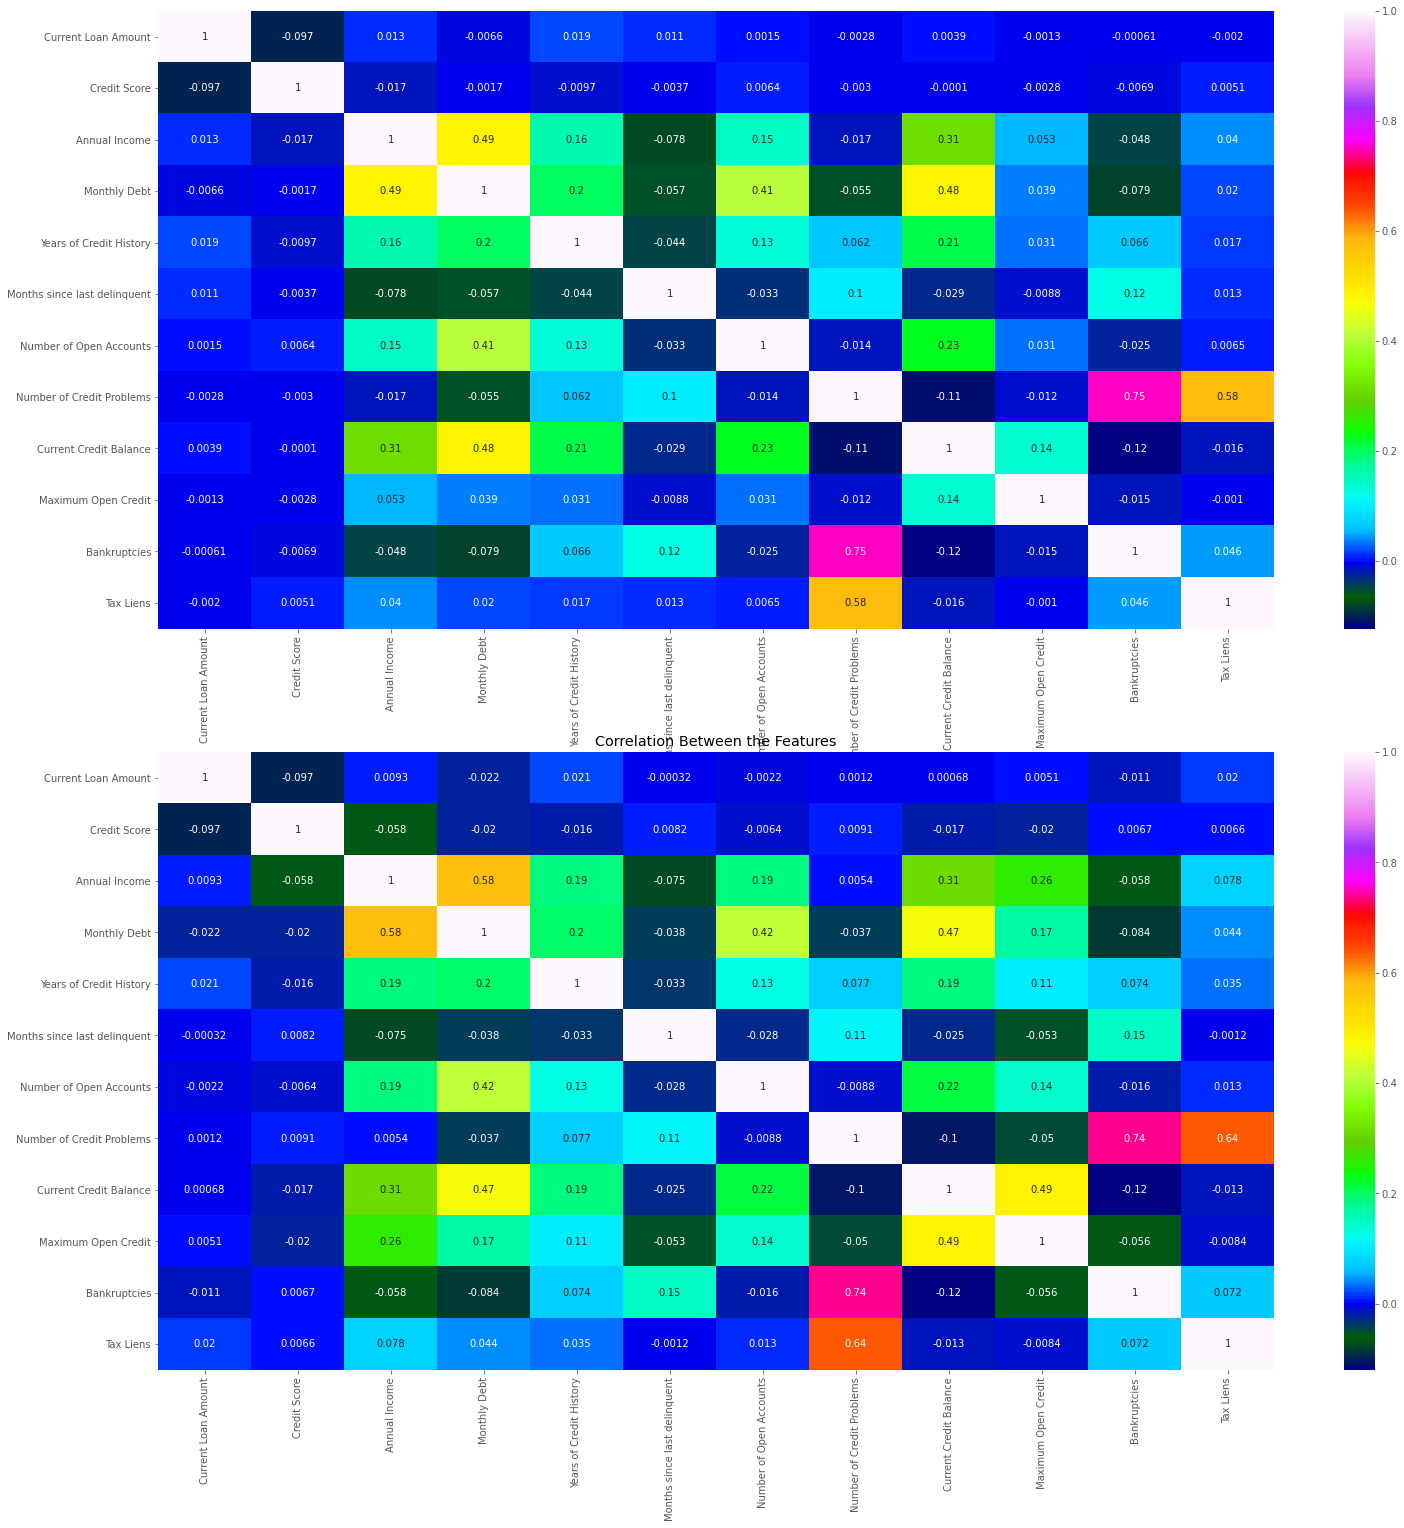

In [17]:
corr = credit_train.corr()
corrt = credit_test.corr()
fig1, ax = plt.subplots(2,1,figsize=(25,25))
sns.heatmap(corr,annot=True,cmap='gist_ncar',ax=ax[0])
sns.heatmap(corrt,annot=True,cmap='gist_ncar',ax=ax[1])
plt.title("Correlation Between the Features")
plt.show()

In [18]:
categorical = credit_train.select_dtypes(include='object')
numerical = credit_train.select_dtypes(exclude='object')

**Distribution of Numerical Variables**

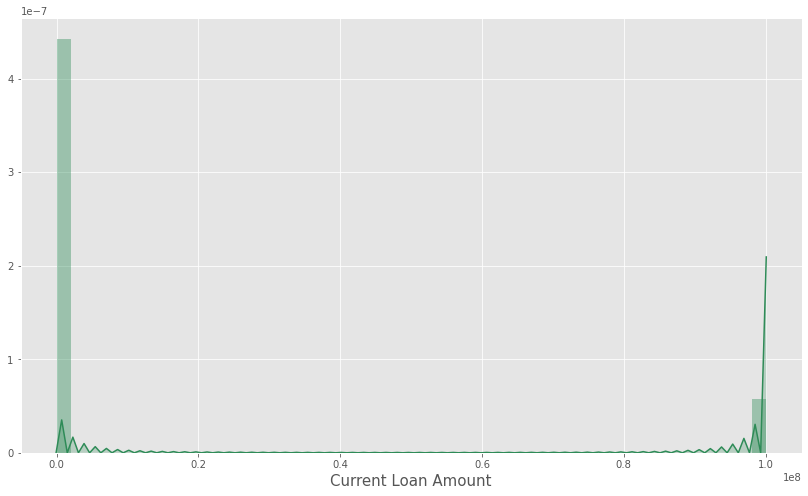

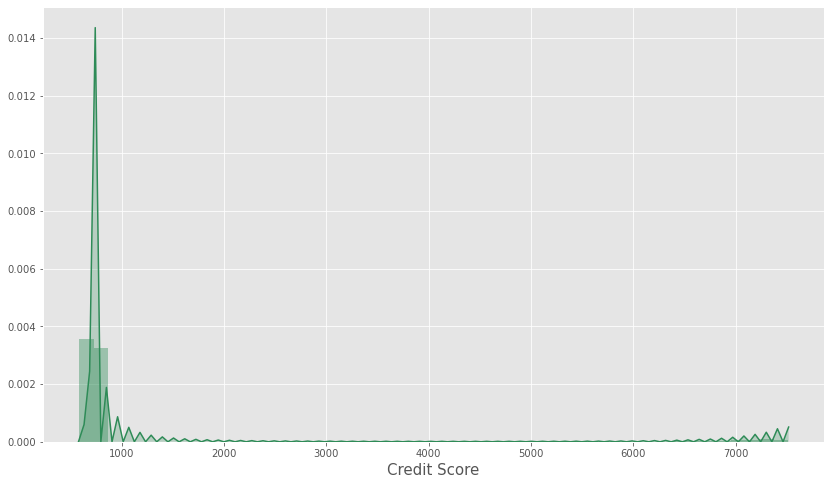

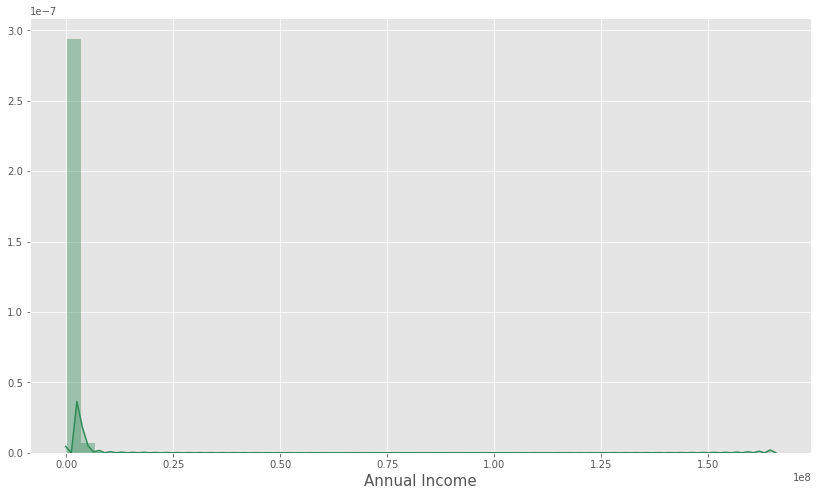

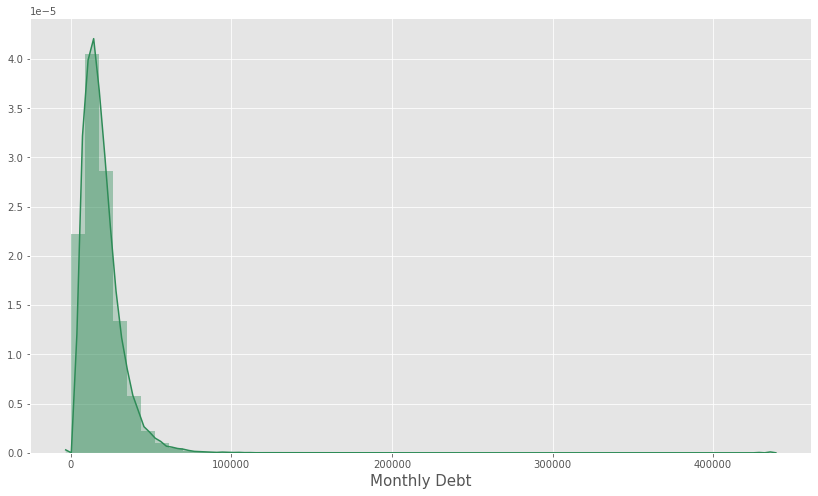

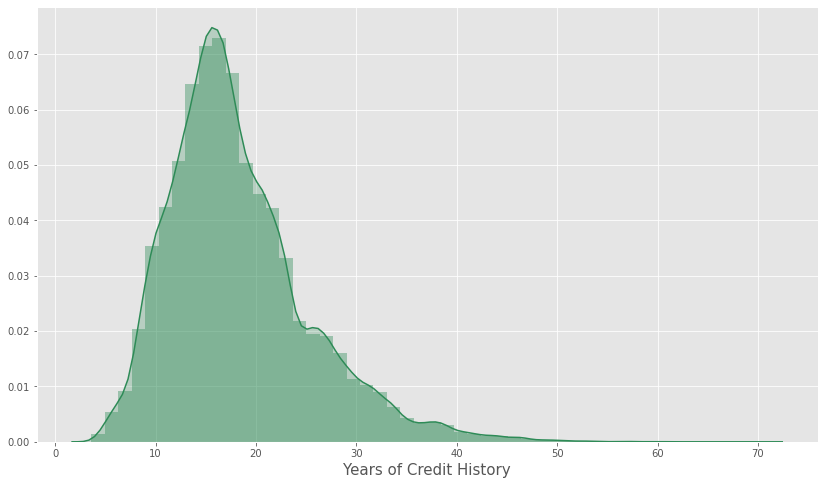

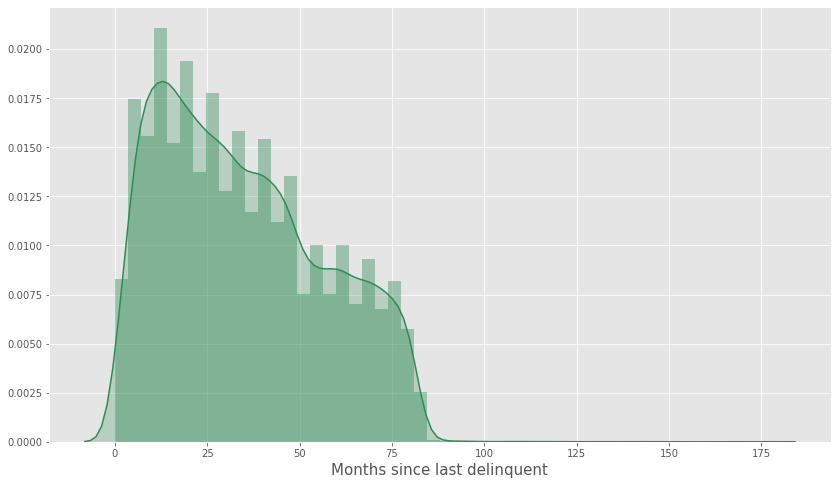

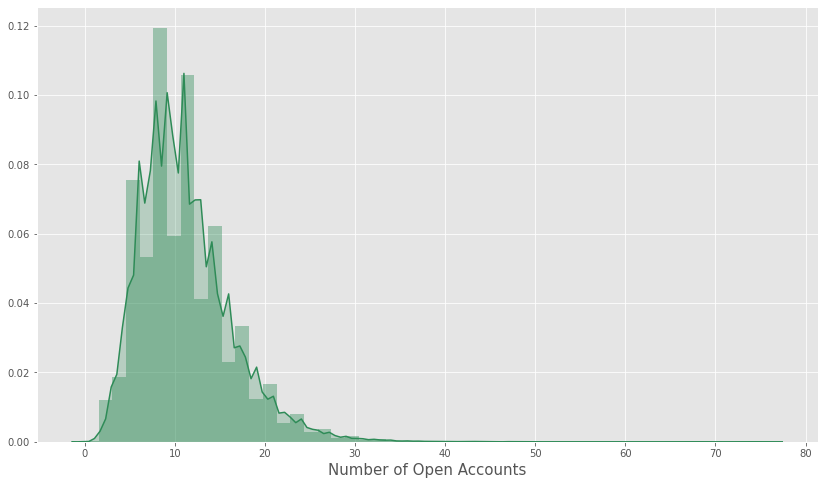

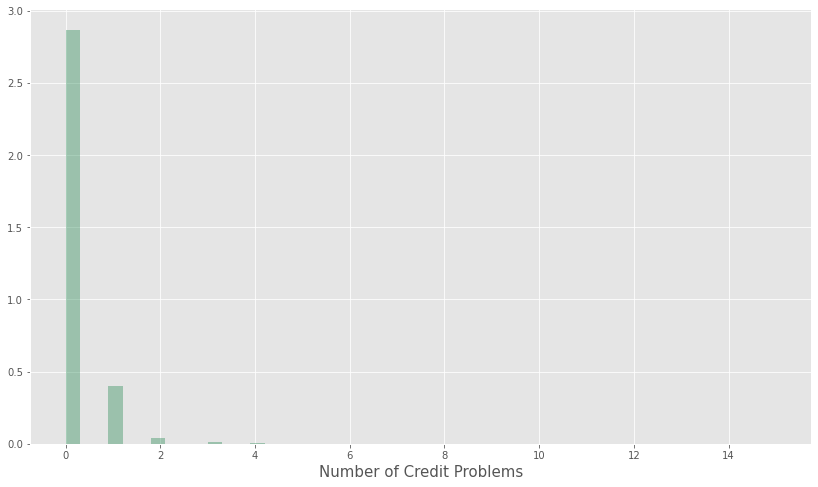

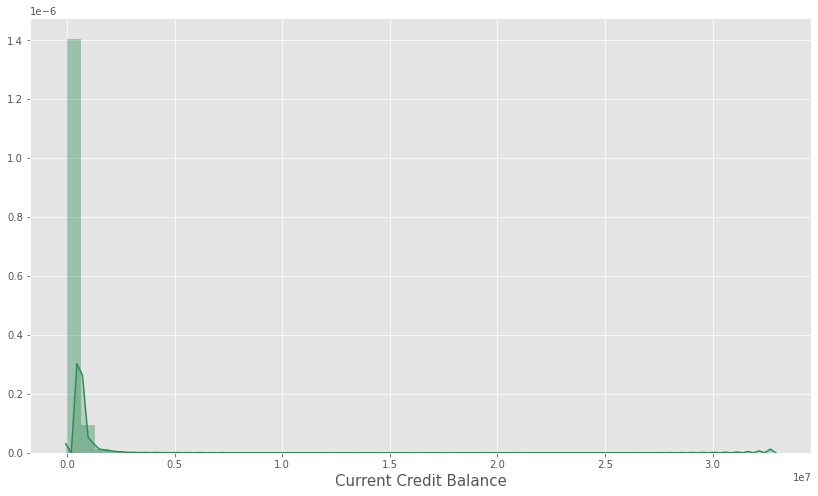

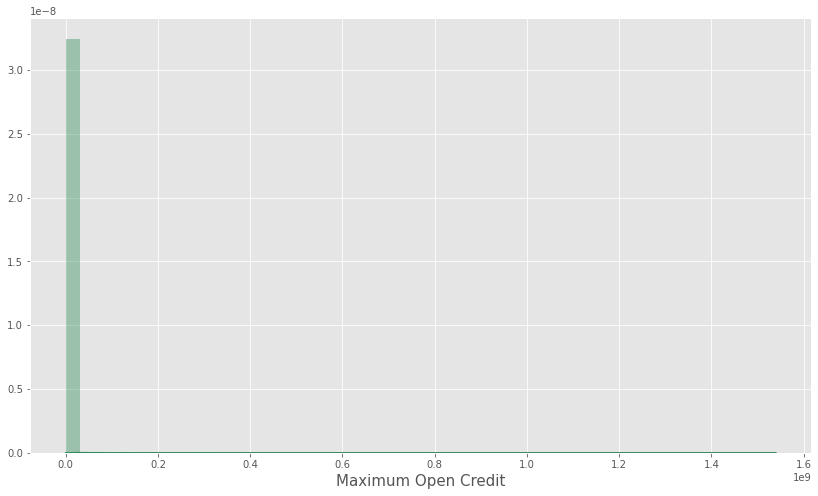

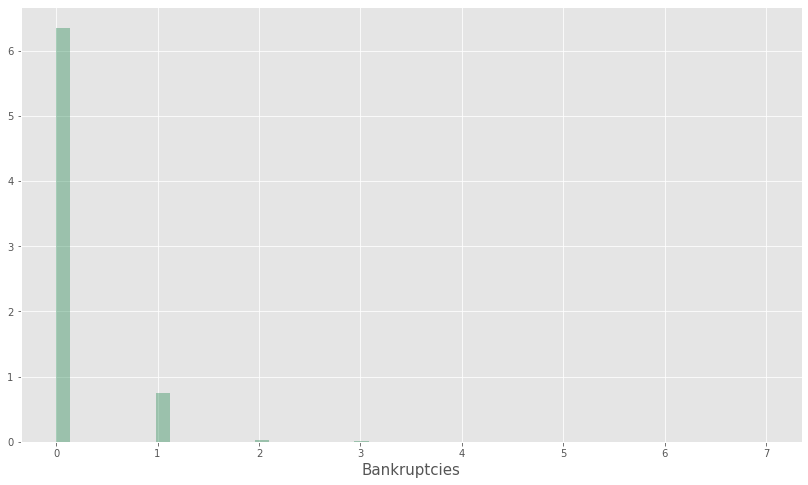

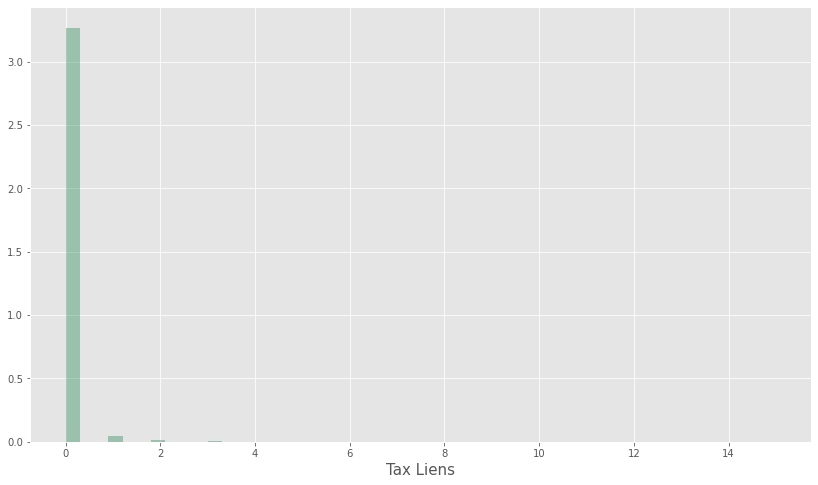

In [19]:
for i in numerical.columns:
    sns.distplot(numerical[i],kde_kws={'shade':True},color='seagreen')
    plt.xlabel(i,fontsize=15)
    plt.show()

**Distribution of Categorical Variables**

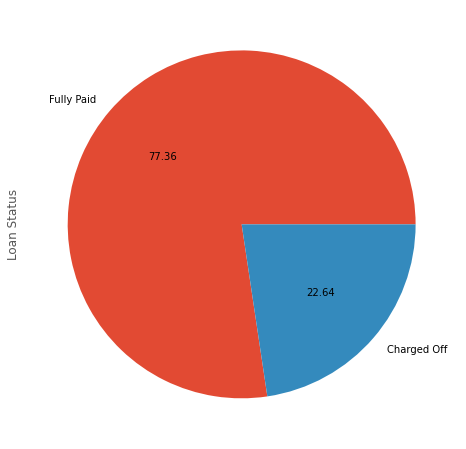

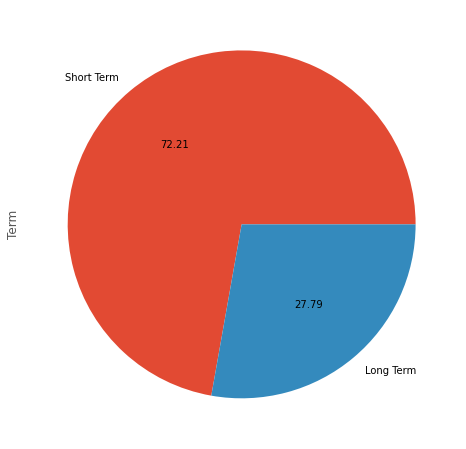

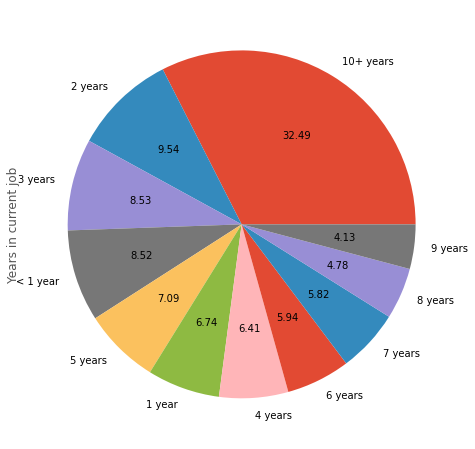

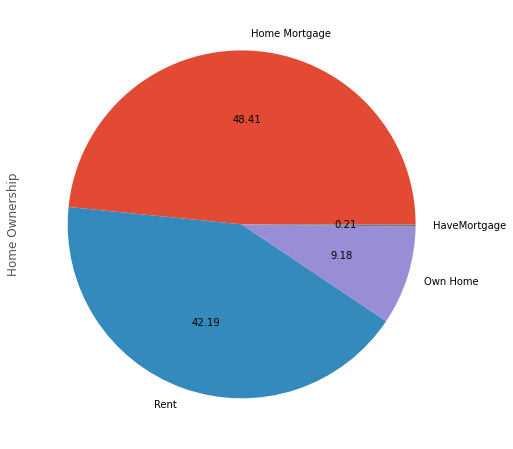

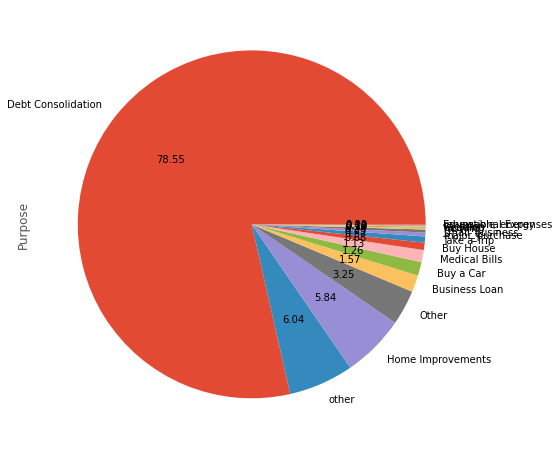

In [20]:
for col in categorical.columns:
    credit_train[col].value_counts().plot(kind='pie',autopct='%.2f')
    plt.show()

**Numerical vs Categorical Visualization**

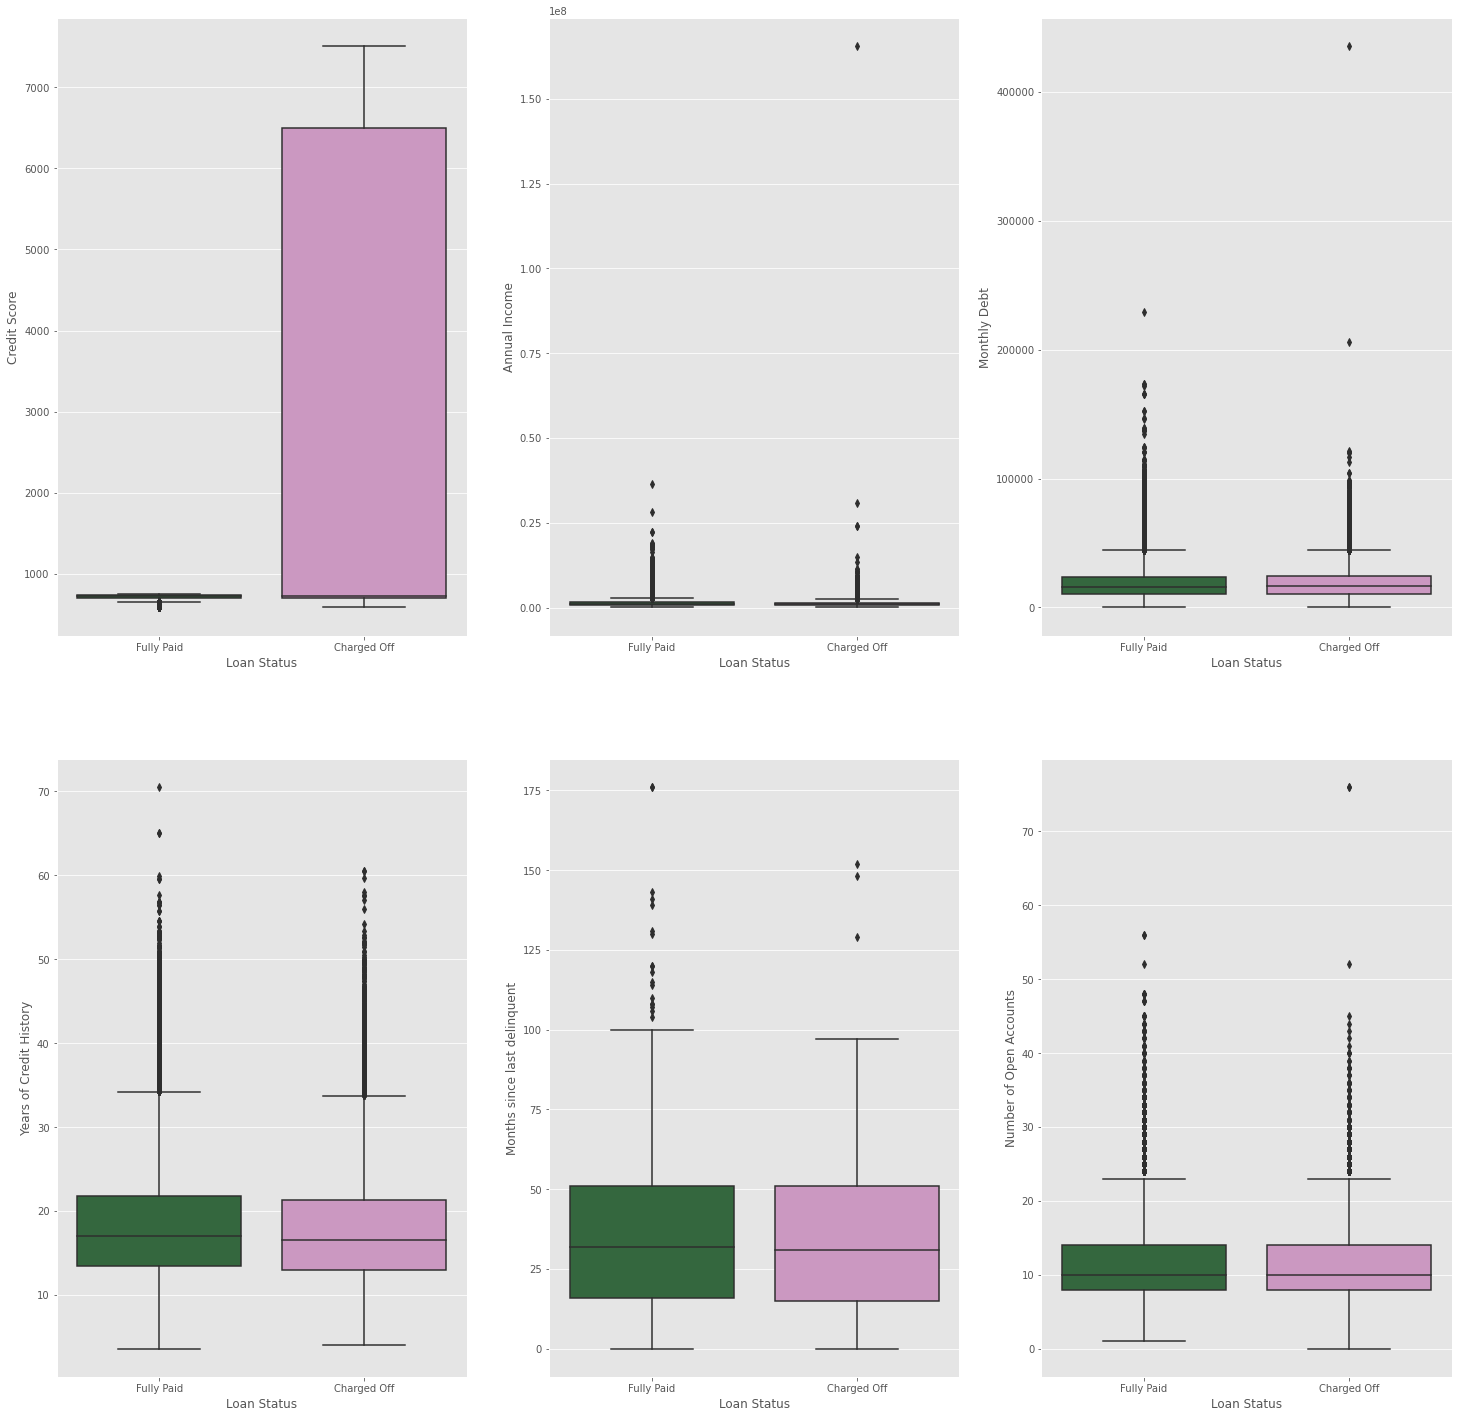

In [21]:
plt.figure(figsize=(25,25))
plt.subplot(2,3,1)
sns.boxplot(x=credit_train['Loan Status'],y=credit_train['Credit Score'] , palette='cubehelix')
plt.subplot(2,3,2)
sns.boxplot(x=credit_train['Loan Status'],y=credit_train['Annual Income'] , palette='cubehelix')
plt.subplot(2,3,3)
sns.boxplot(x=credit_train['Loan Status'],y=credit_train['Monthly Debt'] , palette='cubehelix')
plt.subplot(2,3,4)
sns.boxplot(x=credit_train['Loan Status'],y=credit_train['Years of Credit History'] , palette='cubehelix')
plt.subplot(2,3,5)
sns.boxplot(x=credit_train['Loan Status'],y=credit_train['Months since last delinquent'] , palette='cubehelix')
plt.subplot(2,3,6)
sns.boxplot(x=credit_train['Loan Status'],y=credit_train['Number of Open Accounts'] , palette='cubehelix')
plt.show()

**Categorical vs Categorical Visualization**

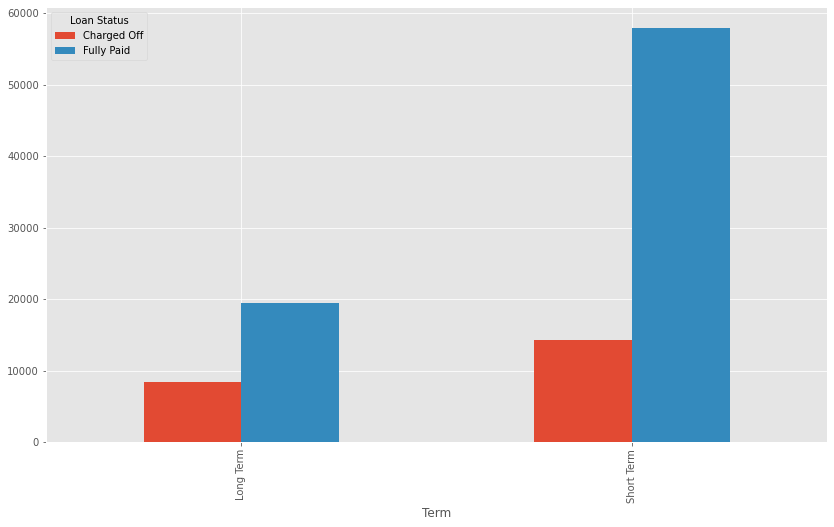

In [22]:
pd.crosstab(credit_train['Term'],credit_train['Loan Status']).plot(kind='bar')
plt.show()

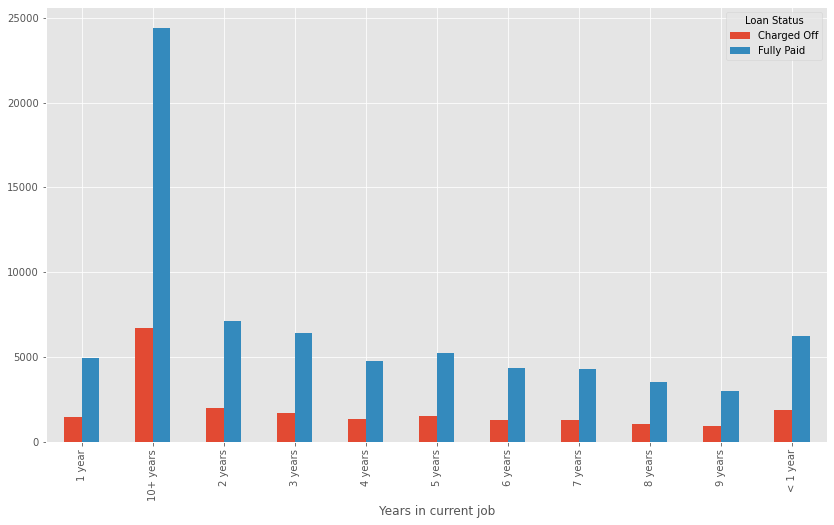

In [23]:
pd.crosstab(credit_train['Years in current job'],credit_train['Loan Status']).plot(kind='bar')
plt.show()

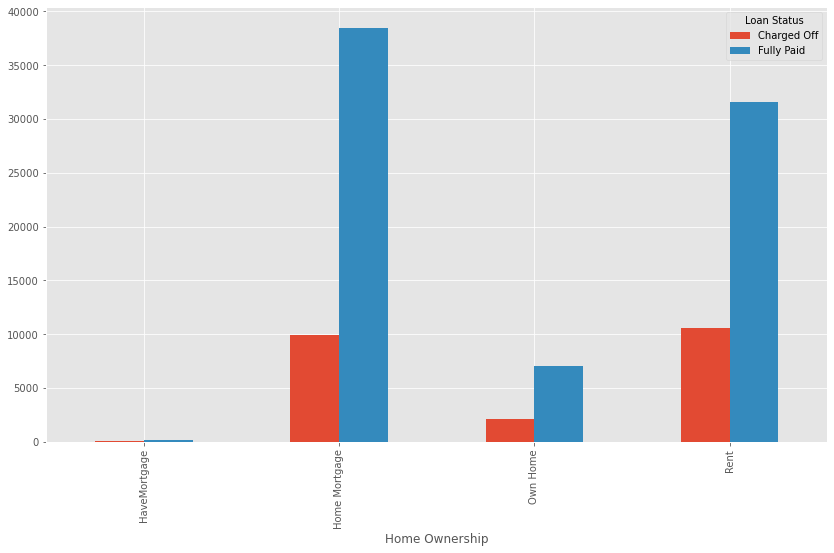

In [24]:
pd.crosstab(credit_train['Home Ownership'],credit_train['Loan Status']).plot(kind='bar')
plt.show()

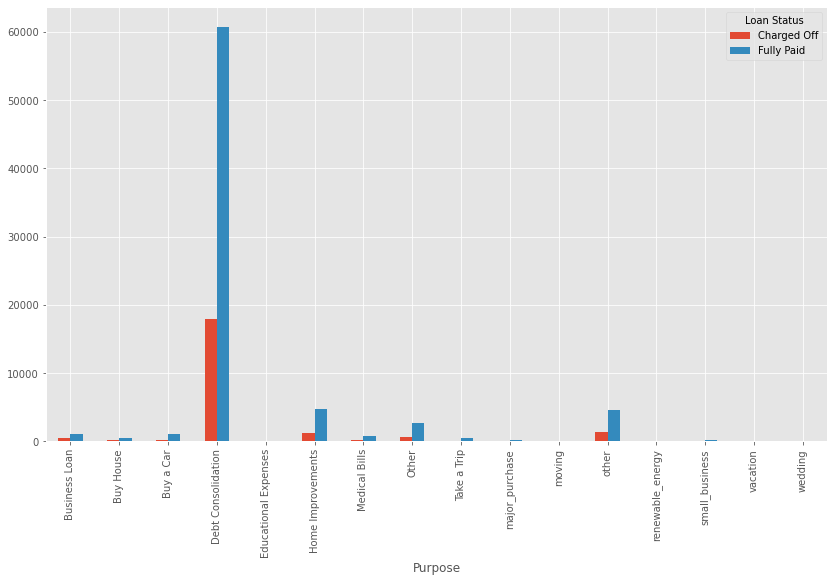

In [25]:
pd.crosstab(credit_train['Purpose'],credit_train['Loan Status']).plot(kind='bar')
plt.show()

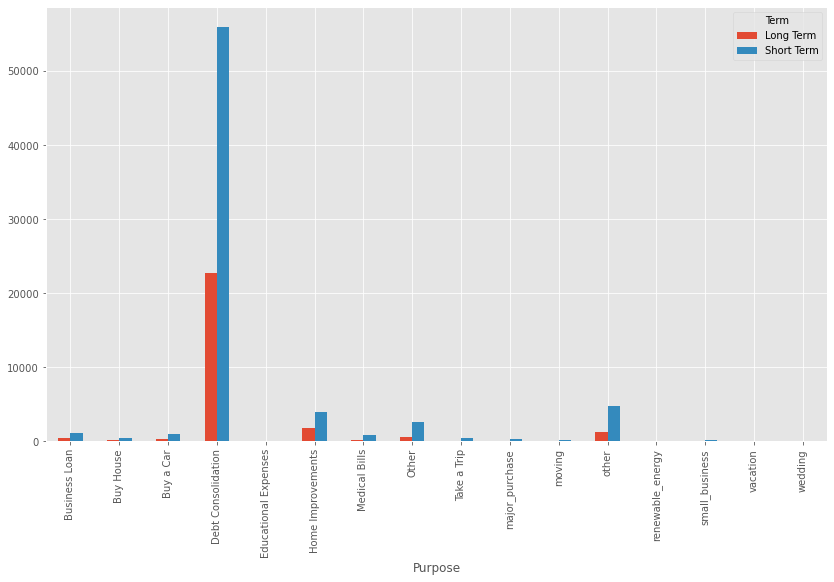

In [26]:
pd.crosstab(credit_train['Purpose'],credit_train['Term']).plot(kind='bar')
plt.show()

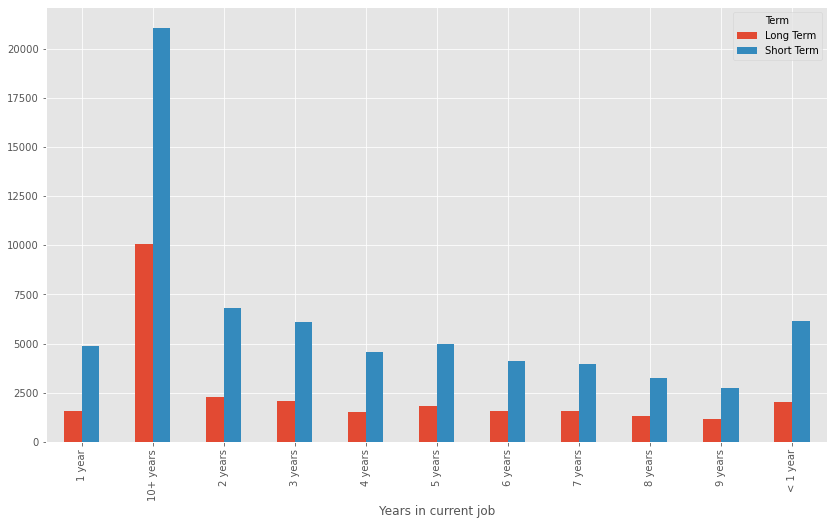

In [27]:
pd.crosstab(credit_train['Years in current job'],credit_train['Term']).plot(kind='bar')
plt.show()

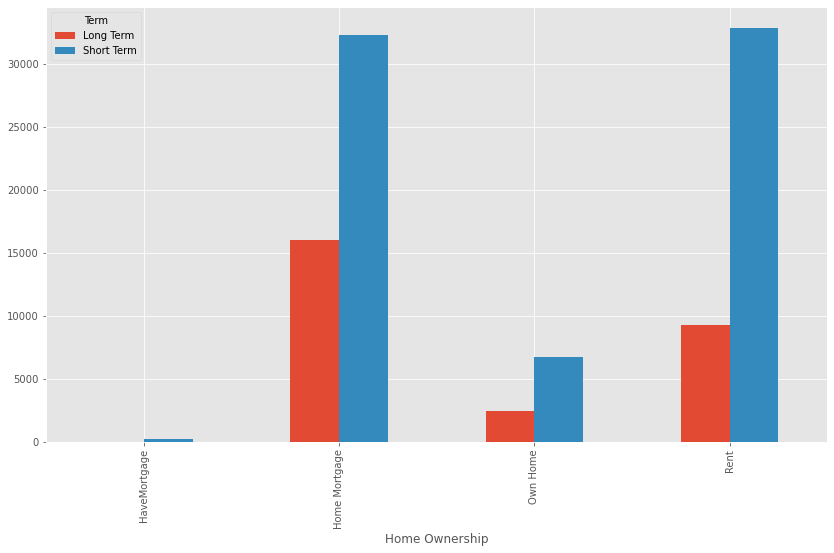

In [28]:
pd.crosstab(credit_train['Home Ownership'],credit_train['Term']).plot(kind='bar')
plt.show()

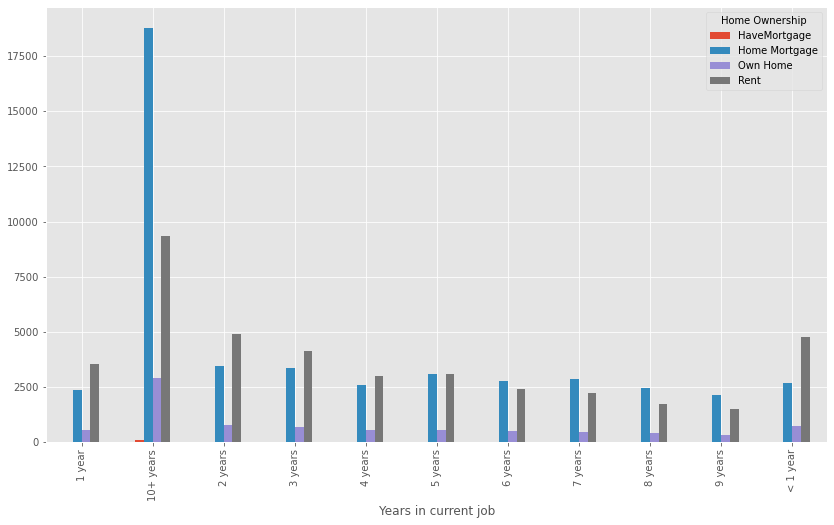

In [29]:
pd.crosstab(credit_train['Years in current job'],credit_train['Home Ownership']).plot(kind='bar')
plt.show()

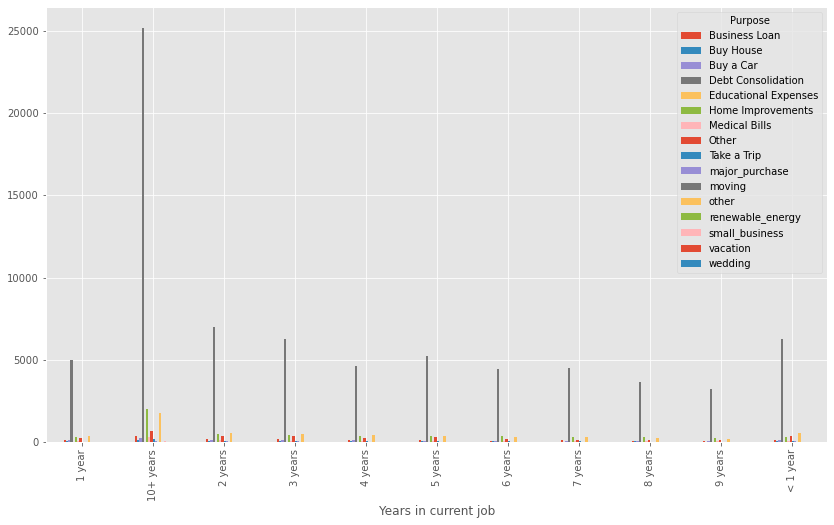

In [30]:
pd.crosstab(credit_train['Years in current job'],credit_train['Purpose']).plot(kind='bar')
plt.show()

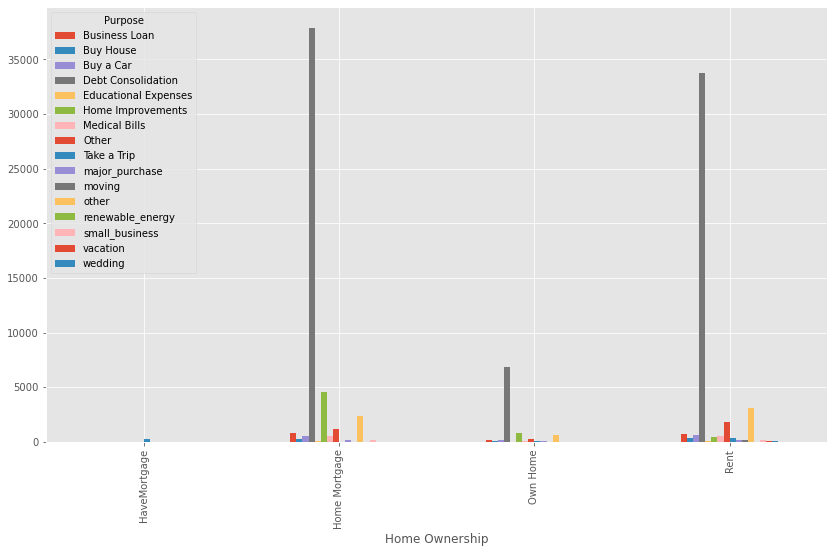

In [31]:
pd.crosstab(credit_train['Home Ownership'],credit_train['Purpose']).plot(kind='bar')
plt.show()

### Pair Plot of the Data
***

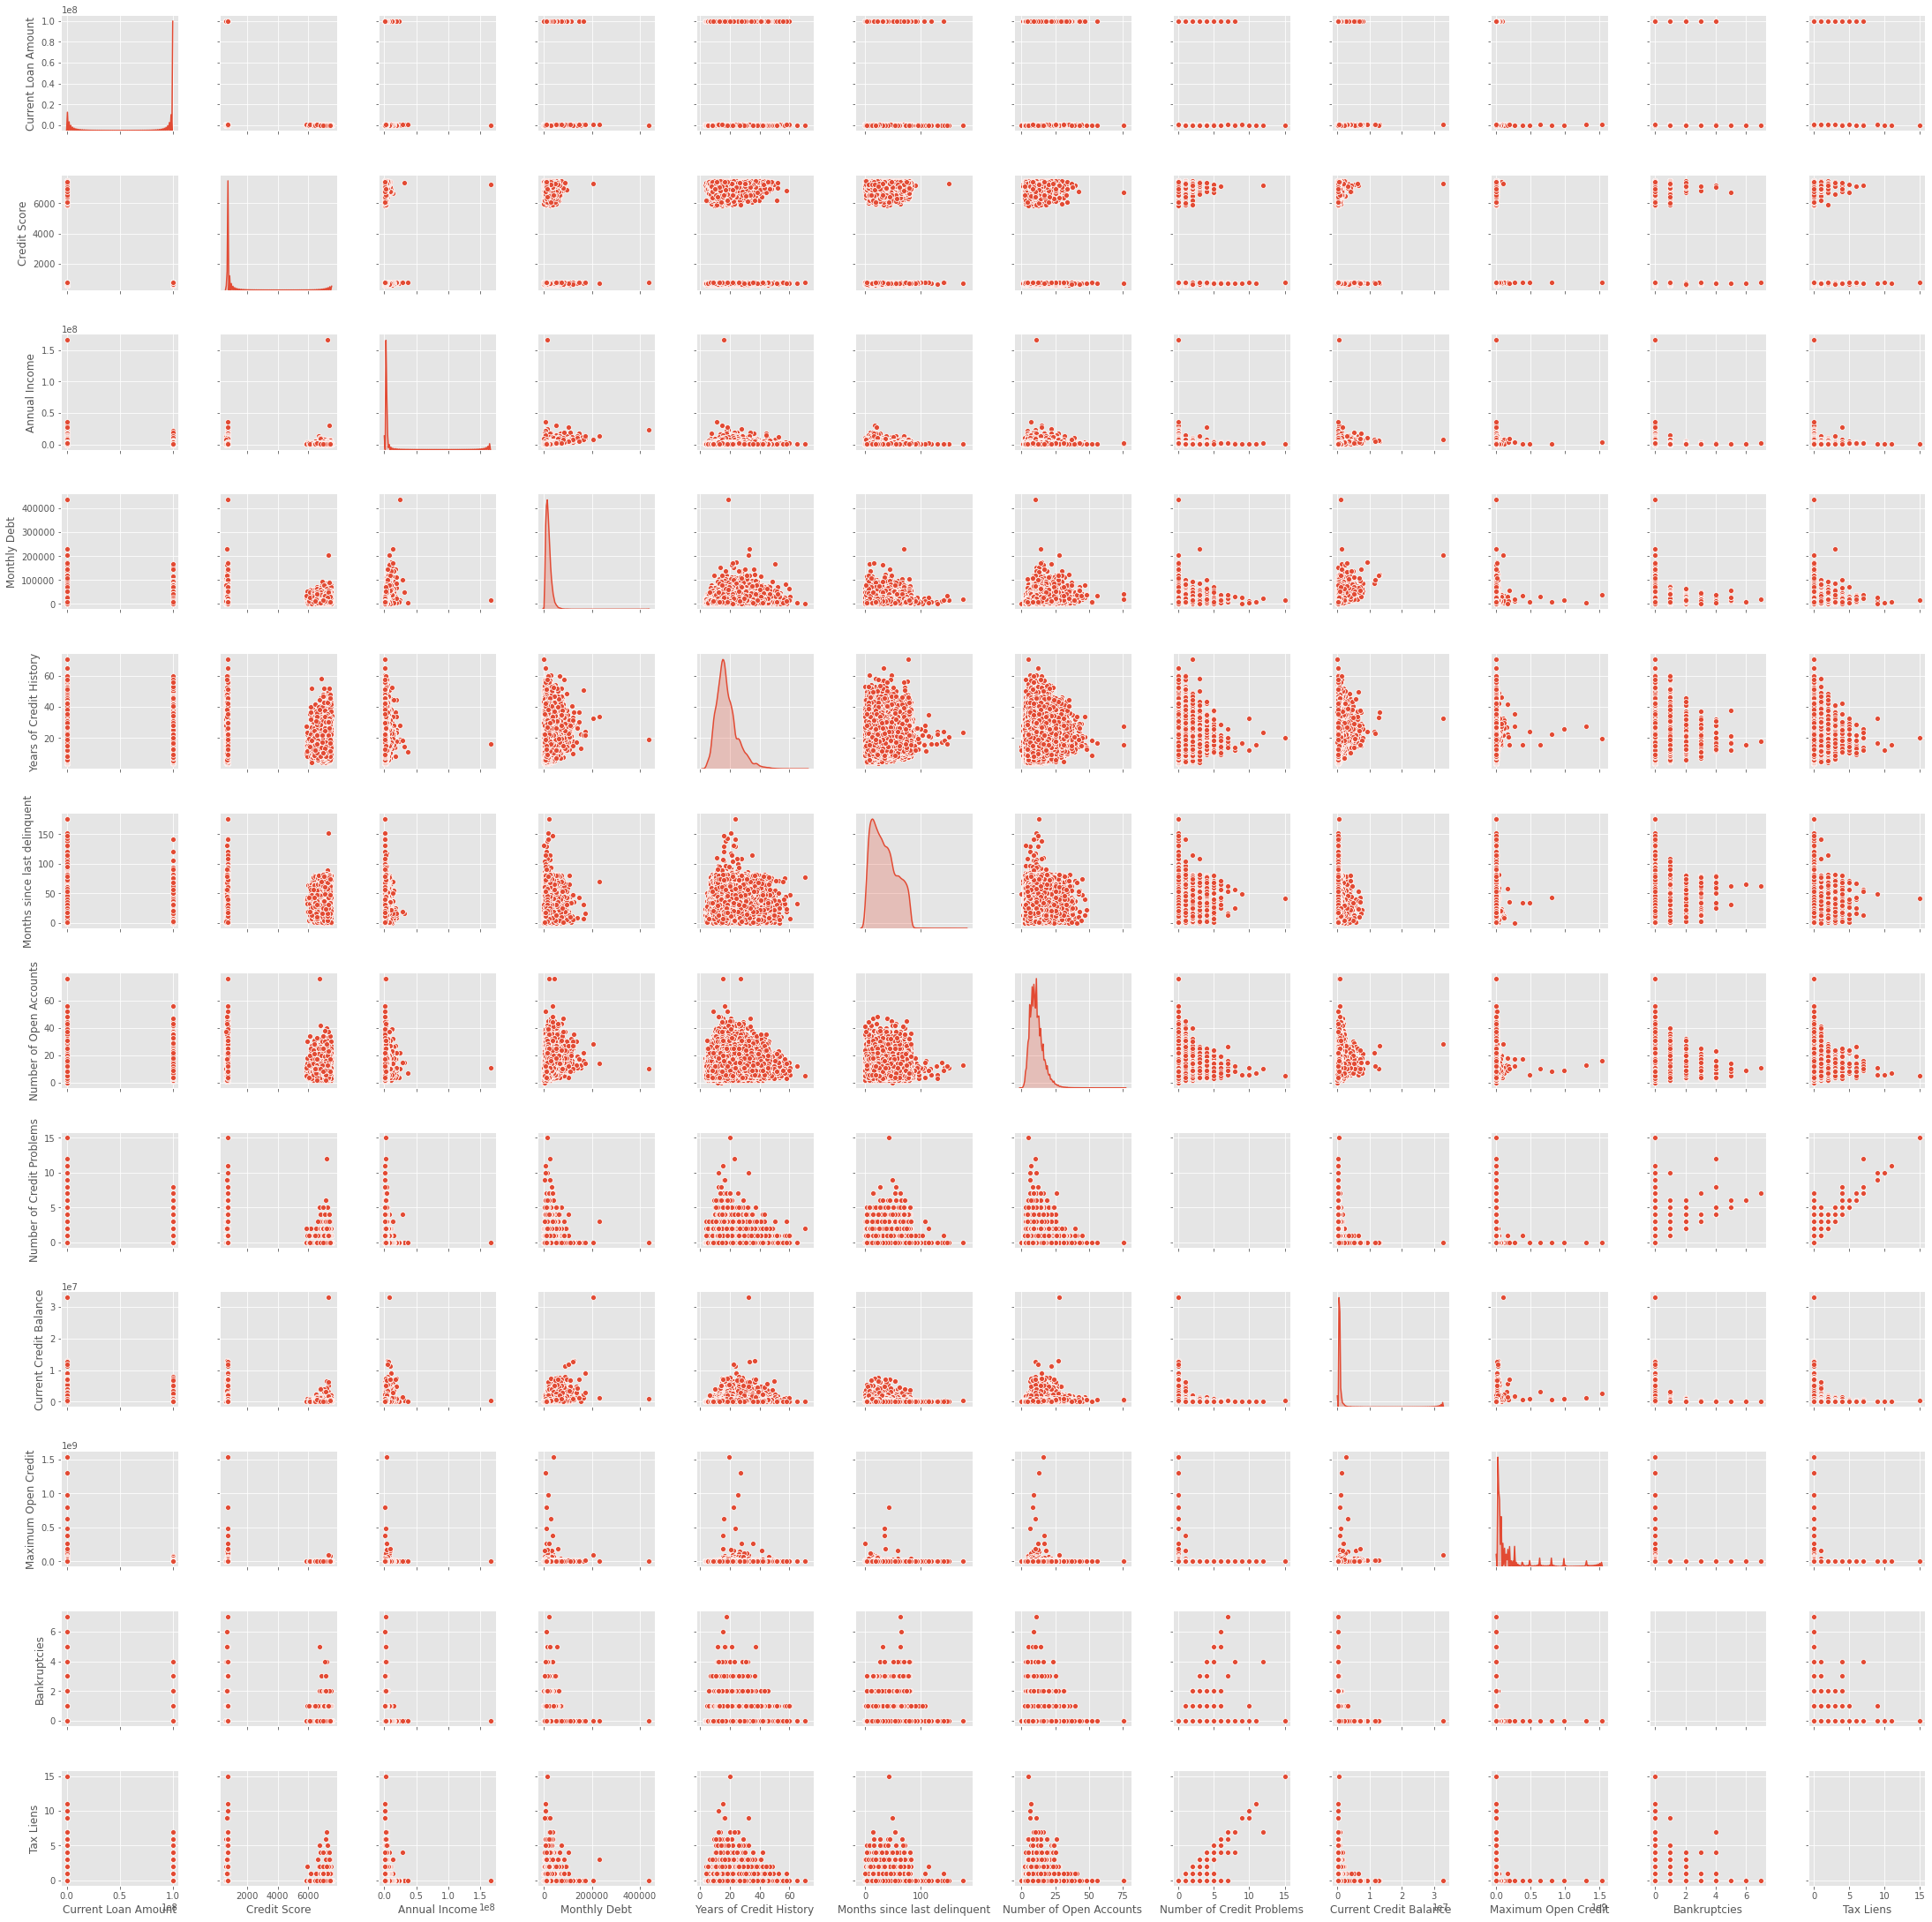

In [32]:
sns.pairplot(credit_train,diag_kind='kde')

### Looking at the categories of categorical columns
***
This is very much important for cleaning of data. And to take a glance of the varienty of data that our domain offers.

In [33]:
for i in categorical.columns:
    print(credit_train[i].value_counts())

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64
Short Term    72208
Long Term     27792
Name: Term, dtype: int64
10+ years    31121
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: Years in current job, dtype: int64
Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: Home Ownership, dtype: int64
Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name

### Data Preparation
***
This is the most important step of data science project or any business problem. The raw data may affect our model so, we need to study the data carefully, the raw structure carefully to avoid any misleading. This cleans the data and makes the dataset in somewhat standard form.

In [34]:
credit_train['Years in current job']=credit_train['Years in current job'].str.replace('years','')
credit_train['Years in current job']=credit_train['Years in current job'].str.replace('year','')
credit_train['Years in current job']=np.where(credit_train['Years in current job'].str[:2]=='10',10,credit_train['Years in current job'])
credit_train['Years in current job']=np.where(credit_train['Years in current job'].str[0]=='<',0,credit_train['Years in current job'])
credit_train['Years in current job']=pd.to_numeric(credit_train['Years in current job'],errors='coerce')

In [35]:
credit_test['Years in current job']=credit_test['Years in current job'].str.replace('years','')
credit_test['Years in current job']=credit_test['Years in current job'].str.replace('year','')
credit_test['Years in current job']=np.where(credit_test['Years in current job'].str[:2]=='10',10,credit_test['Years in current job'])
credit_test['Years in current job']=np.where(credit_test['Years in current job'].str[0]=='<',0,credit_test['Years in current job'])
credit_test['Years in current job']=pd.to_numeric(credit_test['Years in current job'],errors='coerce')

In [36]:
credit_train['Purpose'] = credit_train['Purpose'].str.replace('other','Other')

In [37]:
credit_test['Purpose'] = credit_test['Purpose'].str.replace('other','Other')

### Null Value Imputation
***
Imputing the null values using Iterative Imputer. Iterative Imputer is a multivariate imputer that estimates each feature based on the other features.

In [38]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

II=IterativeImputer()

numerical = credit_train.select_dtypes(exclude='object')
numericalt = credit_test.select_dtypes(exclude='object')

credit_train_num = pd.DataFrame(II.fit_transform(numerical),columns=numerical.columns)
credit_test_num = pd.DataFrame(II.fit_transform(numericalt),columns=numericalt.columns)

In [39]:
credit_train_num.head(2)

Current Loan Amount  Credit Score  Annual Income  Years in current job  \
0             445412.0    709.000000   1.167493e+06                   8.0   
1             262328.0   1124.684209   1.741824e+06                  10.0   

   Monthly Debt  Years of Credit History  Months since last delinquent  \
0       5214.74                     17.2                      42.28348   
1      33295.98                     21.1                       8.00000   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                      6.0                        1.0                228190.0   
1                     35.0                        0.0                229976.0   

   Maximum Open Credit  Bankruptcies  Tax Liens  
0             416746.0           1.0        0.0  
1             850784.0           0.0        0.0

In [40]:
credit_test_num.head(2)

Current Loan Amount  Credit Score  Annual Income  Years in current job  \
0             611314.0         747.0      2074116.0                  10.0   
1             266662.0         734.0      1919190.0                  10.0   

   Monthly Debt  Years of Credit History  Months since last delinquent  \
0      42000.83                     21.8                     34.069209   
1      36624.40                     19.4                     34.920793   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                      9.0                        0.0                621908.0   
1                     11.0                        0.0                679573.0   

   Maximum Open Credit  Bankruptcies  Tax Liens  
0            1058970.0           0.0        0.0  
1             904442.0           0.0        0.0

In [41]:
train_new = pd.concat([credit_train_num,credit_train.select_dtypes(include='object')],axis=1)
train_new.head(5)

Current Loan Amount  Credit Score  Annual Income  Years in current job  \
0             445412.0    709.000000   1.167493e+06                   8.0   
1             262328.0   1124.684209   1.741824e+06                  10.0   
2           99999999.0    741.000000   2.231892e+06                   8.0   
3             347666.0    721.000000   8.069490e+05                   3.0   
4             176220.0   1133.459425   1.274835e+06                   5.0   

   Monthly Debt  Years of Credit History  Months since last delinquent  \
0       5214.74                     17.2                     42.283480   
1      33295.98                     21.1                      8.000000   
2      29200.53                     14.9                     29.000000   
3       8741.90                     12.0                     36.215463   
4      20639.70                      6.1                     35.442265   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                      6.0                        1.0                228190.0   
1                     35.0                        0.0                229976.0   
2                     18.0                        1.0                297996.0   
3                      9.0                        0.0                256329.0   
4                     15.0                        0.0                253460.0   

   Maximum Open Credit  Bankruptcies  Tax Liens Loan Status        Term  \
0             416746.0           1.0        0.0  Fully Paid  Short Term   
1             850784.0           0.0        0.0  Fully Paid  Short Term   
2             750090.0           0.0        0.0  Fully Paid  Short Term   
3             386958.0           0.0        0.0  Fully Paid   Long Term   
4             427174.0           0.0        0.0  Fully Paid  Short Term   

  Home Ownership             Purpose  
0  Home Mortgage   Home Improvements  
1  Home Mortgage  Debt Consolidation  
2       Own Home  Debt Consolidation  
3       Own Home  Debt Consolidation  
4           Rent  Debt Consolidation

In [42]:
test_new = pd.concat([credit_test_num,credit_test.select_dtypes(include='object')],axis=1)
test_new.head(5)

Current Loan Amount  Credit Score  Annual Income  Years in current job  \
0             611314.0         747.0      2074116.0                  10.0   
1             266662.0         734.0      1919190.0                  10.0   
2             153494.0         709.0       871112.0                   2.0   
3             176242.0         727.0       780083.0                  10.0   
4             321992.0         744.0      1761148.0                  10.0   

   Monthly Debt  Years of Credit History  Months since last delinquent  \
0      42000.83                     21.8                     34.069209   
1      36624.40                     19.4                     34.920793   
2       8391.73                     12.5                     10.000000   
3      16771.87                     16.5                     27.000000   
4      39478.77                     26.0                     44.000000   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                      9.0                        0.0                621908.0   
1                     11.0                        0.0                679573.0   
2                     10.0                        0.0                 38532.0   
3                     16.0                        1.0                156940.0   
4                     14.0                        0.0                359765.0   

   Maximum Open Credit  Bankruptcies  Tax Liens        Term Home Ownership  \
0            1058970.0           0.0        0.0  Short Term  Home Mortgage   
1             904442.0           0.0        0.0  Short Term  Home Mortgage   
2             388036.0           0.0        0.0  Short Term           Rent   
3             531322.0           1.0        0.0  Short Term           Rent   
4             468072.0           0.0        0.0  Short Term  Home Mortgage   

              Purpose  
0  Debt Consolidation  
1  Debt Consolidation  
2  Debt Consolidation  
3  Debt Consolidation  
4  Debt Consolidation

### Association between two variables proved statistically

In [43]:
from scipy.stats import chi2_contingency, ttest_ind

**Hypothesis:**
- Null Hypothesis (Ho): There is an assocaition between these two features.
- Alternate Hypothesis (Ha): There is no assocaition between these two features.

In [44]:
chi2_contingency(pd.crosstab(credit_train['Term'],credit_train['Loan Status']))

(1223.4732802762514,
 4.8299360525552625e-268,
 1,
 array([[ 6291.83088, 21500.16912],
        [16347.16912, 55860.83088]]))

In [45]:
chi2_contingency(pd.crosstab(credit_train['Years in current job'],credit_train['Loan Status']))

(34.73659482600701,
 0.00013846759483906272,
 10,
 array([[ 1821.29704107,  6342.70295893],
        [ 1441.15370962,  5018.84629038],
        [ 2037.69318633,  7096.30681367],
        [ 1822.41248512,  6346.58751488],
        [ 1370.434557  ,  4772.565443  ],
        [ 1514.10375034,  5272.89624966],
        [ 1268.48297104,  4417.51702896],
        [ 1244.1662908 ,  4332.8337092 ],
        [ 1022.19292531,  3559.80707469],
        [  882.31624173,  3072.68375827],
        [ 6942.74684165, 24178.25315835]]))

In [46]:
chi2_contingency(pd.crosstab(credit_train['Home Ownership'],credit_train['Loan Status']))

(285.7898155921374,
 1.1830557755684353e-61,
 3,
 array([[   48.44746,   165.55254],
        [10959.5399 , 37450.4601 ],
        [ 2078.71298,  7103.28702],
        [ 9552.29966, 32641.70034]]))

In [47]:
chi2_contingency(pd.crosstab(credit_train['Purpose'],credit_train['Loan Status']))

(191.7040139446477,
 2.7041777563420866e-33,
 14,
 array([[3.55205910e+02, 1.21379409e+03],
        [1.53492420e+02, 5.24507580e+02],
        [2.86383350e+02, 9.78616650e+02],
        [1.77833873e+04, 6.07686127e+04],
        [2.24126100e+01, 7.65873900e+01],
        [1.32189121e+03, 4.51710879e+03],
        [2.55141530e+02, 8.71858470e+02],
        [2.10248393e+03, 7.18451607e+03],
        [1.29721470e+02, 4.43278530e+02],
        [7.96892800e+01, 2.72310720e+02],
        [3.39585000e+01, 1.16041500e+02],
        [2.26390000e+00, 7.73610000e+00],
        [6.40683700e+01, 2.18931630e+02],
        [2.28653900e+01, 7.81346100e+01],
        [2.60348500e+01, 8.89651500e+01]]))

In [48]:
chi2_contingency(pd.crosstab(credit_train['Purpose'],credit_train['Term']))

(557.8069387693063,
 4.9953209680145293e-110,
 14,
 array([[4.36056480e+02, 1.13294352e+03],
        [1.88429760e+02, 4.89570240e+02],
        [3.51568800e+02, 9.13431200e+02],
        [2.18311718e+04, 5.67208282e+04],
        [2.75140800e+01, 7.14859200e+01],
        [1.62277488e+03, 4.21622512e+03],
        [3.13215840e+02, 8.13784160e+02],
        [2.58104304e+03, 6.70595696e+03],
        [1.59248160e+02, 4.13751840e+02],
        [9.78278400e+01, 2.54172160e+02],
        [4.16880000e+01, 1.08312000e+02],
        [2.77920000e+00, 7.22080000e+00],
        [7.86513600e+01, 2.04348640e+02],
        [2.80699200e+01, 7.29300800e+01],
        [3.19608000e+01, 8.30392000e+01]]))

In [49]:
chi2_contingency(pd.crosstab(credit_train['Years in current job'],credit_train['Term']))

(480.4636933087102,
 6.579713279578097e-97,
 10,
 array([[ 2310.05621333,  5853.94378667],
        [ 1827.89847355,  4632.10152645],
        [ 2584.52394078,  6549.47605922],
        [ 2311.47099543,  5857.52900457],
        [ 1738.2012884 ,  4404.7987116 ],
        [ 1920.42522291,  4866.57477709],
        [ 1608.89020443,  4077.10979557],
        [ 1578.04795465,  3998.95204535],
        [ 1296.50631669,  3285.49368331],
        [ 1119.09264132,  2835.90735868],
        [ 8805.88674852, 22315.11325148]]))

In [50]:
chi2_contingency(pd.crosstab(credit_train['Home Ownership'],credit_train['Term']))

(1449.9419460318104,
 0.0,
 3,
 array([[   59.47488,   154.52512],
        [13454.1072 , 34955.8928 ],
        [ 2551.86144,  6630.13856],
        [11726.55648, 30467.44352]]))

In [51]:
chi2_contingency(pd.crosstab(credit_train['Years in current job'],credit_train['Home Ownership']))

(4363.534456751318,
 0.0,
 30,
 array([[1.75591890e+01, 3.96275094e+03, 7.17966255e+02, 3.46572361e+03],
        [1.38942137e+01, 3.13564075e+03, 5.68111466e+02, 2.74235357e+03],
        [1.96454718e+01, 4.43358245e+03, 8.03270918e+02, 3.87750116e+03],
        [1.75699430e+01, 3.96517791e+03, 7.18405970e+02, 3.46784618e+03],
        [1.32124079e+01, 2.98177107e+03, 5.40233551e+02, 2.60778297e+03],
        [1.45975276e+01, 3.29436436e+03, 5.96868811e+02, 2.88116930e+03],
        [1.22294890e+01, 2.75994633e+03, 5.00043622e+02, 2.41378056e+03],
        [1.19950511e+01, 2.70703846e+03, 4.90457840e+02, 2.36750864e+03],
        [9.85499802e+00, 2.22407213e+03, 4.02954603e+02, 1.94511827e+03],
        [8.50644198e+00, 1.91973052e+03, 3.47814373e+02, 1.67894866e+03],
        [6.69352670e+01, 1.51059251e+04, 2.73687259e+03, 1.32112671e+04]]))

In [52]:
chi2_contingency(pd.crosstab(credit_train['Years in current job'],credit_train['Purpose']))

(831.5391529523611,
 9.542480435798177e-99,
 140,
 array([[1.30671052e+02, 5.55756854e+01, 1.03394642e+02, 6.42691887e+03,
         8.09768423e+00, 4.70688551e+02, 8.89892877e+01, 7.50442231e+02,
         4.66256134e+01, 2.83845142e+01, 1.18481906e+01, 8.52387813e-01,
         2.36963812e+01, 8.09768423e+00, 9.71722107e+00],
        [1.03397231e+02, 4.39758608e+01, 8.18139865e+01, 5.08548456e+03,
         6.40752574e+00, 3.72445864e+02, 7.04153355e+01, 5.93809017e+02,
         3.68938587e+01, 2.24600639e+01, 9.37522187e+00, 6.74476393e-01,
         1.87504437e+01, 6.40752574e+00, 7.68903088e+00],
        [1.46196642e+02, 6.21788720e+01, 1.15679404e+02, 7.19052879e+03,
         9.05980497e+00, 5.26613084e+02, 9.95624883e+01, 8.39605504e+02,
         5.21654033e+01, 3.17570006e+01, 1.32559252e+01, 9.53663681e-01,
         2.65118503e+01, 9.05980497e+00, 1.08717660e+01],
        [1.30751081e+02, 5.56097225e+01, 1.03457965e+02, 6.43085501e+03,
         8.10264361e+00, 4.70976821e+02, 8.904

In [53]:
chi2_contingency(pd.crosstab(credit_train['Home Ownership'],credit_train['Purpose']))

(41043.41928875278,
 0.0,
 42,
 array([[3.35766000e+00, 1.45092000e+00, 2.70710000e+00, 1.68101280e+02,
         2.11860000e-01, 1.24954600e+01, 2.41178000e+00, 1.98741800e+01,
         1.22622000e+00, 7.53280000e-01, 3.21000000e-01, 2.14000000e-02,
         6.05620000e-01, 2.16140000e-01, 2.46100000e-01],
        [7.59552900e+02, 3.28219800e+02, 6.12386500e+02, 3.80270232e+04,
         4.79259000e+01, 2.82665990e+03, 5.45580700e+02, 4.49583670e+03,
         2.77389300e+02, 1.70403200e+02, 7.26150000e+01, 4.84100000e+00,
         1.37000300e+02, 4.88941000e+01, 5.56715000e+01],
        [1.44065580e+02, 6.22539600e+01, 1.16152300e+02, 7.21264464e+03,
         9.09018000e+00, 5.36136980e+02, 1.03481140e+02, 8.52732340e+02,
         5.26128600e+01, 3.23206400e+01, 1.37730000e+01, 9.18200000e-01,
         2.59850600e+01, 9.27382000e+00, 1.05593000e+01],
        [6.62023860e+02, 2.86075320e+02, 5.33754100e+02, 3.31442309e+04,
         4.17720600e+01, 2.46370766e+03, 4.75526380e+02, 3.918556

### Creating dummies of categorical columns
***
The data in the categorical column can not be used for modeling and this encourage us to encode the data. there are various types of encoding, pd.get_dummies, label_encoder of sklearn and some more. I'm using the pd.get_dummies by creating a user defined function.

In [54]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the train and test

train_new = dummies('Term',train_new)
train_new = dummies('Home Ownership',train_new)
train_new = dummies('Purpose',train_new)


test_new = dummies('Term',test_new)
test_new = dummies('Home Ownership',test_new)
test_new = dummies('Purpose',test_new)

In [55]:
train_new.head(2)

Current Loan Amount  Credit Score  Annual Income  Years in current job  \
0             445412.0    709.000000   1.167493e+06                   8.0   
1             262328.0   1124.684209   1.741824e+06                  10.0   

   Monthly Debt  Years of Credit History  Months since last delinquent  \
0       5214.74                     17.2                      42.28348   
1      33295.98                     21.1                       8.00000   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                      6.0                        1.0                228190.0   
1                     35.0                        0.0                229976.0   

   ...  Home Improvements  Medical Bills  Other Take a Trip  major_purchase  \
0  ...                  1              0      0           0               0   
1  ...                  0              0      0           0               0   

   moving  renewable_energy  small_business  vacation  wedding  
0       0                 0               0         0        0  
1       0                 0               0         0        0  

[2 rows x 32 columns]

In [56]:
train_new.isnull().sum()

Current Loan Amount               0
Credit Score                      0
Annual Income                     0
Years in current job              0
Monthly Debt                      0
Years of Credit History           0
Months since last delinquent      0
Number of Open Accounts           0
Number of Credit Problems         0
Current Credit Balance            0
Maximum Open Credit               0
Bankruptcies                      0
Tax Liens                         0
Loan Status                     514
Short Term                        0
Home Mortgage                     0
Own Home                          0
Rent                              0
Buy House                         0
Buy a Car                         0
Debt Consolidation                0
Educational Expenses              0
Home Improvements                 0
Medical Bills                     0
Other                             0
Take a Trip                       0
major_purchase                    0
moving                      

In [57]:
train_new.dropna(axis=0,how='any',inplace=True)

### Mapping the Loan Status to 0 and 1

In [58]:
train_new['Loan Status'] = train_new['Loan Status'].map({'Fully Paid':1,'Charged Off':0})

In [59]:
train_new['Loan Status'].value_counts()

1    77361
0    22639
Name: Loan Status, dtype: int64

### Splitting dataset into X and y

In [60]:
X = train_new.drop(['Loan Status'],axis=1)
y = train_new['Loan Status']

### Splitting the dataset into training and validation

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3,random_state=42)

**Hypothesis:**
- **Null Hypothesis (Ho)**: Data does not represent overall data.
- **Alternate Hypothesis (Ha)**: Data represent overall data.

In [62]:
from scipy.stats import ttest_ind
ttest_ind(X_train,y_train)

Ttest_indResult(statistic=array([  97.58360457,  217.1058166 ,  347.16487907,  378.48099548,
        401.60678099,  654.59227173,  594.11252378,  543.37428264,
       -249.66592334,  215.18965551,   23.37365158, -317.18173158,
       -398.7213636 ,  -22.80871244, -117.3329644 , -353.95506594,
       -144.59214889, -476.38252117, -465.28390621,    5.9213036 ,
       -487.49022987, -394.54382756, -467.79597821, -355.43572795,
       -478.38890158, -482.42873337, -486.314173  , -489.25148859,
       -483.66925239, -487.26026936, -486.97315067]), pvalue=array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 1.35087677e-120, 0.00000000e+000,
       0.00000000e+000, 6.09653722e-115, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 3.20141022e-009,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e

- As the all the p-vaues for model are less than 0.05, the **data represent overall data.**

In [63]:
from scipy.stats import ttest_ind
ttest_ind(X_test,y_test)

Ttest_indResult(statistic=array([  64.56286447,  141.30281061,  272.05537361,  248.67996001,
        262.47644117,  431.67038495,  390.93519106,  359.19690465,
       -165.6723413 ,  125.26661617,   16.89884292, -208.8404007 ,
       -264.90095651,  -13.68767696,  -77.19784807, -233.49919956,
        -92.78300067, -310.44768551, -303.52781325,    2.68954411,
       -318.23867731, -258.11882356, -305.19688917, -228.79431223,
       -311.780274  , -314.99507199, -317.80201231, -319.46831608,
       -316.06828436, -318.50130329, -318.32616694]), pvalue=array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.45331218e-64, 0.00000000e+00,
       0.00000000e+00, 1.39414069e-42, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.15694724e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e

- As the all the p-vaues for model are less than 0.05, the **data represent overall data.**

### Power Transformation of Data

In [64]:
PT = PowerTransformer()
X_train_pt = PT.fit_transform(X_train)
X_test_pt = PT.transform(X_test)

### User Defined Function for modeling
***
We are going to apply numerous models on this data and for simplicity or ease functioning, I've written a user defined function for modeling. Which can be applied to various classification algorithms. The output will result the Accuracy, Classification Report, Confusion Matrix, ROC AUC Score for Train and Test dataset and ROC CUrve on the test dataset.

In [65]:
def model_eval(algo, xtrain, xtest, ytrain, ytest):
    algo.fit(xtrain,ytrain)
    
    y_train_pred = algo.predict(xtrain)
    y_train_prob = algo.predict_proba(xtrain)[:,1]
    
    print("Accuracy Score Train: ", accuracy_score(ytrain,y_train_pred))
    print("Classification Report Train: \n", classification_report(ytrain,y_train_pred))
    print("Confusion Matrix Train: \n", confusion_matrix(ytrain, y_train_pred))
    print("ROC AUC Score Train: ", roc_auc_score(ytrain,y_train_prob))
    
    y_test_pred = algo.predict(xtest)
    y_test_prob = algo.predict_proba(xtest)[:,1]
    
    print()
    
    print("Accuracy Score Test: ", accuracy_score(ytest,y_test_pred))
    print("Classification Report Test: \n", classification_report(ytest,y_test_pred))
    print("Confusion Matrix Test: \n", confusion_matrix(ytest, y_test_pred))
    print("ROC AUC Score Test: ", roc_auc_score(ytest,y_test_prob))
    
    fpr, tpr, thresholds = roc_curve(ytest,y_test_prob)
    thresholds[0] = thresholds[0]-1
    
    fig, ax=plt.subplots()
    ax.plot(fpr,fpr,'black')
    ax.plot(fpr,tpr,'green')
    ax1=ax.twinx()
    ax1.plot(fpr,thresholds)
    ax1.set_ylabel("Thresholds")
    ax.set_xlabel("FPR")
    ax.set_ylabel("TPR")
    plt.title("ROC Curve", fontsize=15)
    plt.show()

### Base Logistic Regression Model

Accuracy Score Train:  0.8154
Classification Report Train: 
               precision    recall  f1-score   support

           0       0.92      0.20      0.33     15827
           1       0.81      0.99      0.89     54173

    accuracy                           0.82     70000
   macro avg       0.86      0.60      0.61     70000
weighted avg       0.83      0.82      0.77     70000

Confusion Matrix Train: 
 [[ 3194 12633]
 [  289 53884]]
ROC AUC Score Train:  0.6914943408925418

Accuracy Score Test:  0.8152333333333334
Classification Report Test: 
               precision    recall  f1-score   support

           0       0.92      0.20      0.33      6812
           1       0.81      0.99      0.89     23188

    accuracy                           0.82     30000
   macro avg       0.86      0.60      0.61     30000
weighted avg       0.83      0.82      0.77     30000

Confusion Matrix Test: 
 [[ 1394  5418]
 [  125 23063]]
ROC AUC Score Test:  0.6961350397288735


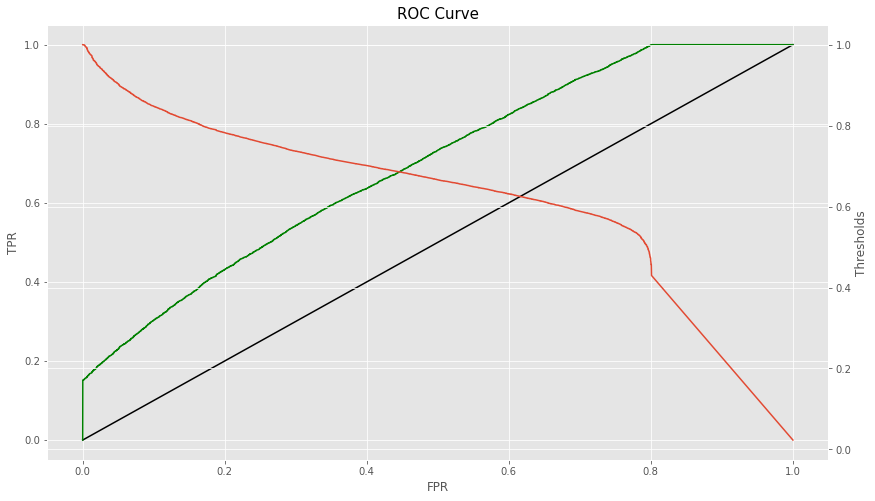

In [66]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train,y_train)

model_eval(lr, X_train, X_test, y_train, y_test)

### Logistic Regression using Power Transformed data

Accuracy Score Train:  0.8034
Classification Report Train: 
               precision    recall  f1-score   support

           0       0.70      0.23      0.34     15827
           1       0.81      0.97      0.88     54173

    accuracy                           0.80     70000
   macro avg       0.76      0.60      0.61     70000
weighted avg       0.79      0.80      0.76     70000

Confusion Matrix Train: 
 [[ 3568 12259]
 [ 1503 52670]]
ROC AUC Score Train:  0.6968721635301265

Accuracy Score Test:  0.8018666666666666
Classification Report Test: 
               precision    recall  f1-score   support

           0       0.70      0.22      0.34      6812
           1       0.81      0.97      0.88     23188

    accuracy                           0.80     30000
   macro avg       0.75      0.60      0.61     30000
weighted avg       0.78      0.80      0.76     30000

Confusion Matrix Test: 
 [[ 1531  5281]
 [  663 22525]]
ROC AUC Score Test:  0.6985872440854914


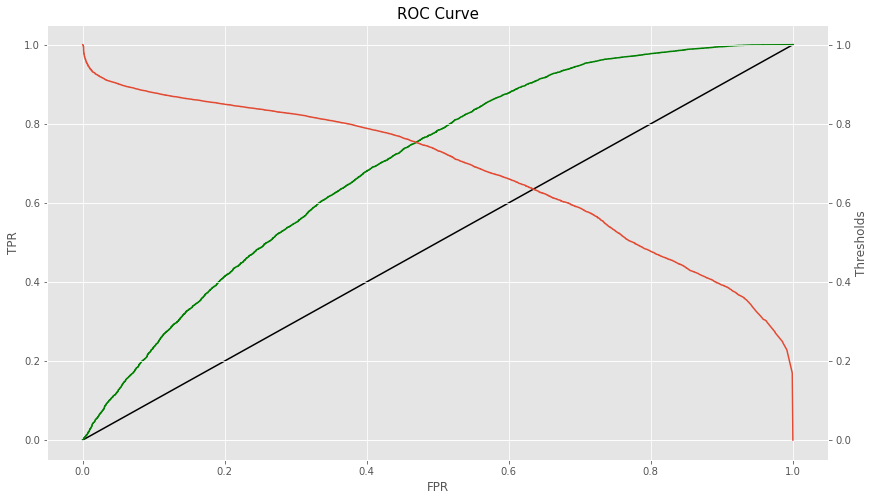

In [67]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5000)

model_eval(lr, X_train_pt, X_test_pt, y_train, y_test)

### Random Forest Classifier

Accuracy Score Train:  1.0
Classification Report Train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15827
           1       1.00      1.00      1.00     54173

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000

Confusion Matrix Train: 
 [[15827     0]
 [    0 54173]]
ROC AUC Score Train:  1.0

Accuracy Score Test:  0.8196666666666667
Classification Report Test: 
               precision    recall  f1-score   support

           0       0.90      0.23      0.37      6812
           1       0.81      0.99      0.89     23188

    accuracy                           0.82     30000
   macro avg       0.86      0.61      0.63     30000
weighted avg       0.83      0.82      0.78     30000

Confusion Matrix Test: 
 [[ 1569  5243]
 [  167 23021]]
ROC AUC Score Test:  0.7729387421318922


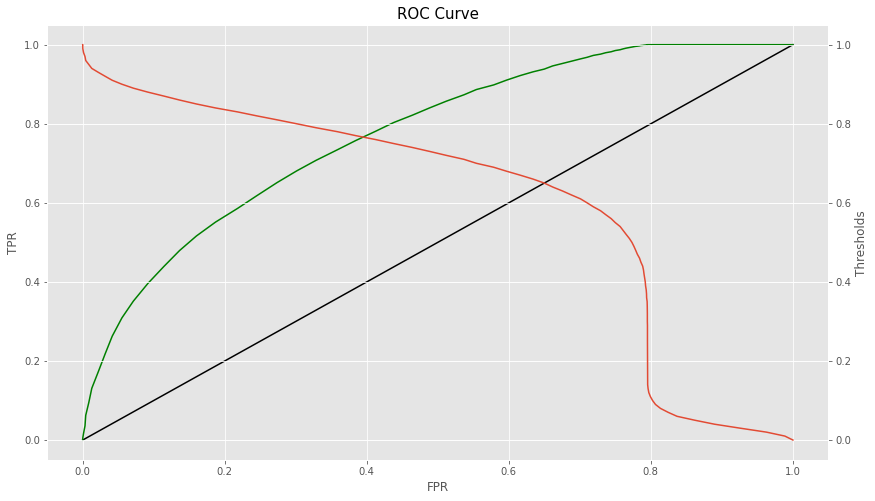

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model_eval(rfc,X_train_pt,X_test_pt,y_train,y_test)

### Tunning of Random Forest Classifier

In [69]:
X_pt = PT.fit_transform(X)

In [70]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [71]:
rfc = RandomForestClassifier()

params = {'n_estimators':sp_randint(100,500,25),
         'min_samples_leaf':sp_randint(2,25),
         'min_samples_split':sp_randint(2,35),
         'max_depth':sp_randint(2,10),
         'criterion':['gini','entropy'],
         'max_features':sp_randint(2,15)}

rsearch_rfc = RandomizedSearchCV(rfc,
                                 cv=3,
                                 param_distributions=params,
                                 n_iter=150,
                                 scoring='roc_auc',
                                 n_jobs=-1)

rsearch_rfc.fit(X_pt,y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002676497A190>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026764CF9CA0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026767C4EF70>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026761830BB0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000267687E9B50>},
                   scoring='roc_auc')

In [72]:
rsearch_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 13,
 'min_samples_leaf': 17,
 'min_samples_split': 17,
 'n_estimators': 151}

Accuracy Score Train:  0.8226
Classification Report Train: 
               precision    recall  f1-score   support

           0       0.98      0.22      0.36     15827
           1       0.81      1.00      0.90     54173

    accuracy                           0.82     70000
   macro avg       0.90      0.61      0.63     70000
weighted avg       0.85      0.82      0.78     70000

Confusion Matrix Train: 
 [[ 3474 12353]
 [   65 54108]]
ROC AUC Score Train:  0.7622204895781474

Accuracy Score Test:  0.8193666666666667
Classification Report Test: 
               precision    recall  f1-score   support

           0       0.95      0.21      0.35      6812
           1       0.81      1.00      0.90     23188

    accuracy                           0.82     30000
   macro avg       0.88      0.61      0.62     30000
weighted avg       0.84      0.82      0.77     30000

Confusion Matrix Test: 
 [[ 1462  5350]
 [   69 23119]]
ROC AUC Score Test:  0.7225746599750758


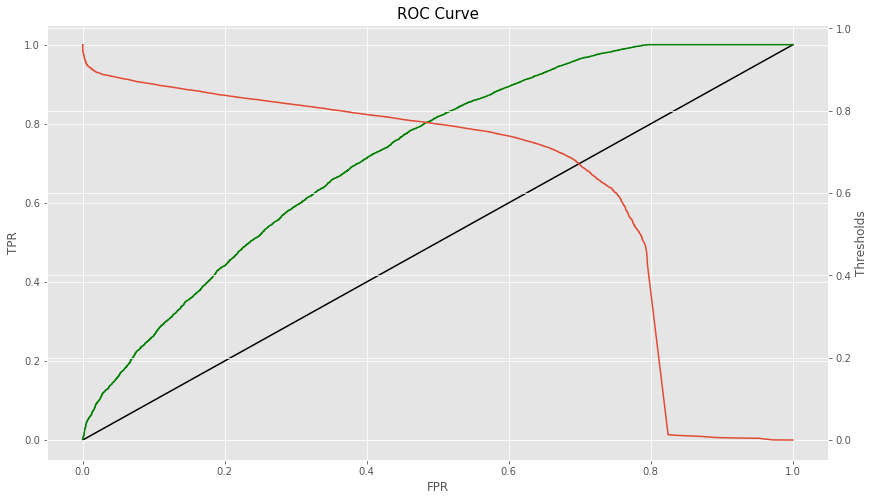

In [73]:
rfc = RandomForestClassifier(**rsearch_rfc.best_params_)
model_eval(rfc,X_train_pt,X_test_pt,y_train,y_test)

### Standard Scaling of Data

In [74]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_trains = SS.fit_transform(X_train)
X_tests = SS.transform(X_test)

### Light GBM

Accuracy Score Train:  0.8257142857142857
Classification Report Train: 
               precision    recall  f1-score   support

           0       0.97      0.24      0.38     15827
           1       0.82      1.00      0.90     54173

    accuracy                           0.83     70000
   macro avg       0.89      0.62      0.64     70000
weighted avg       0.85      0.83      0.78     70000

Confusion Matrix Train: 
 [[ 3734 12093]
 [  107 54066]]
ROC AUC Score Train:  0.8281693035656563

Accuracy Score Test:  0.8204666666666667
Classification Report Test: 
               precision    recall  f1-score   support

           0       0.94      0.22      0.36      6812
           1       0.81      1.00      0.90     23188

    accuracy                           0.82     30000
   macro avg       0.88      0.61      0.63     30000
weighted avg       0.84      0.82      0.77     30000

Confusion Matrix Test: 
 [[ 1530  5282]
 [  104 23084]]
ROC AUC Score Test:  0.7660224049058116


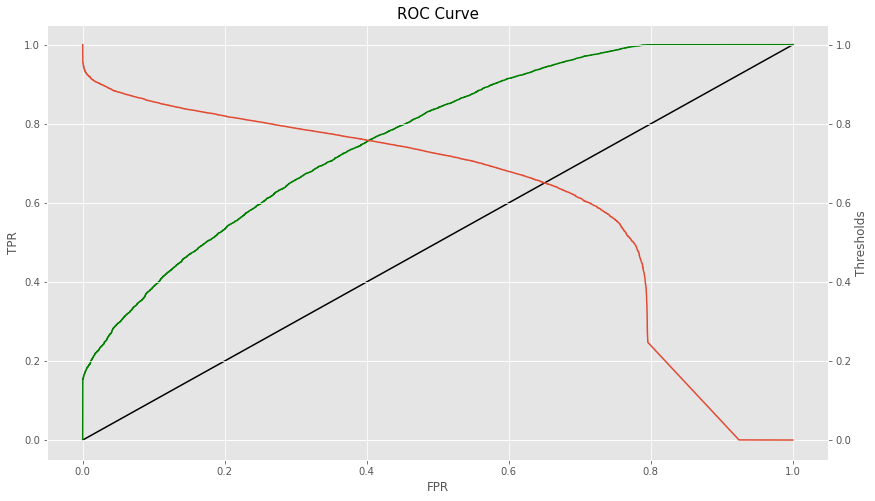

In [75]:
import lightgbm as lgb
lgbc = lgb.LGBMClassifier()
model_eval(lgbc,X_trains,X_tests,y_train,y_test)

### Tunning Light GBM

In [76]:
X_s = SS.fit_transform(X)

In [77]:
lgbc = lgb.LGBMClassifier()

params = {'n_estimators':sp_randint(5,1000),
         'max_depth':sp_randint(2,10),
         'learning_rate':sp_uniform(0,0.3),
         'num_leaves':sp_randint(10,200)}

rsearch_lgbc = RandomizedSearchCV(lgbc,
                                  cv=5, 
                                  n_iter=200,
                                  param_distributions=params,
                                  scoring='roc_auc',
                                  n_jobs=-1)

rsearch_lgbc.fit(X_s,y)

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=200, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026702010160>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026701DA34C0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026770801D90>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026701FFED30>},
                   scoring='roc_auc')

In [78]:
rsearch_lgbc.best_params_

{'learning_rate': 0.24691820322489277,
 'max_depth': 9,
 'n_estimators': 846,
 'num_leaves': 173}

Accuracy Score Train:  1.0
Classification Report Train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15827
           1       1.00      1.00      1.00     54173

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000

Confusion Matrix Train: 
 [[15827     0]
 [    0 54173]]
ROC AUC Score Train:  1.0

Accuracy Score Test:  0.812
Classification Report Test: 
               precision    recall  f1-score   support

           0       0.69      0.31      0.43      6812
           1       0.83      0.96      0.89     23188

    accuracy                           0.81     30000
   macro avg       0.76      0.63      0.66     30000
weighted avg       0.80      0.81      0.78     30000

Confusion Matrix Test: 
 [[ 2107  4705]
 [  935 22253]]
ROC AUC Score Test:  0.7704161323850766


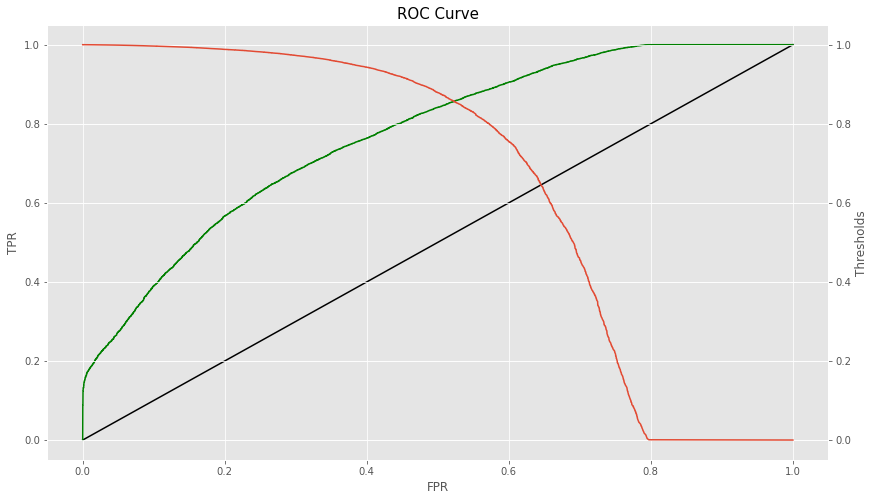

In [79]:
lgbc = lgb.LGBMClassifier(**rsearch_lgbc.best_params_)
model_eval(lgbc,X_trains,X_tests,y_train,y_test)

### XGBoost Classifier

[23:34:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score Train:  0.8402285714285714
Classification Report Train: 
               precision    recall  f1-score   support

           0       0.95      0.31      0.47     15827
           1       0.83      1.00      0.91     54173

    accuracy                           0.84     70000
   macro avg       0.89      0.65      0.69     70000
weighted avg       0.86      0.84      0.81     70000

Confusion Matrix Train: 
 [[ 4902 10925]
 [  259 53914]]
ROC AUC Score Train:  0.8700579005802325

Accuracy Score Test:  0.8191333333333334
Classification Report Test: 
               precision    recall  f1-score   support

           0       0.84      0.25      0.39      6812
           

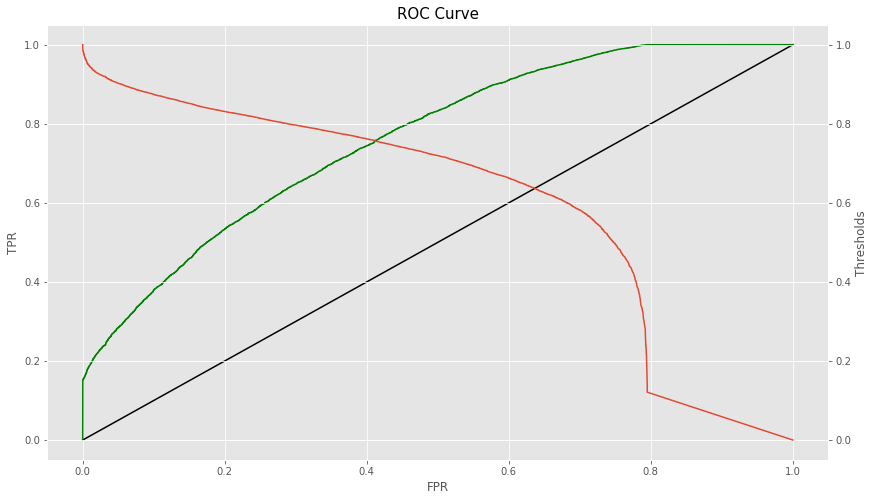

In [80]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
model_eval(xgb,X_train,X_test,y_train,y_test)

### **Key Concepts**

- **Precision**: Ratio of positive is correctly predicted as positive. High precison means we have low false positive . (TP/(TP+FP))
  
- **Recall**: Ratio of correctly predicted positve observations to all the observations in class 'Fully Paid' or 1.
        
- **F1-Score**: F1 Score is the weighted average of precision and Recall. This score takes both false positive and false negative into account.

### **Key Obsevations of Best XGBoost Classifier Tunned Model:**
- **Accuracy** for the train is **0.84** and for the test is **0.81**. Overall Accuracy Score is quite good for this model, getting good score for train and test both and that too without tunning.
- **AUC-ROC Score** is competitively good for train and test, **0.87** and **0.76** respectively. We can be infered as good score.
- The overfitting clearly vanished here.

- **Precision**: Ratio of positive is correctly predicted as positive. High precison means we have low false positive . (TP/(TP+FP))
- We have got a good precision value for both the class of 0 has **0.84** and label 1 has **0.82** for test, considering good as 0.5.
  
  
- **Recall**: Ratio of correctly predicted positve observations to all the observations in class 'Fully Paid' or 1.
- We have got a good recall value for label 0 as **0.25** and label 1 as **0.99** for test.

        
- **F1-Score**: F1 Score is the weighted average of precision and Recall. This score takes both false positive and false negative into account.
- We have got F1 Score of **0.89** for test data which is very good.

### **What changes from the base model had the most effect on model performance?**

- I have taken 5 steps to tune and imrovize the model.


**Step1: First I will try the model with transformed and scaled data. If that, gives best result from Logistic Regression. I will keep that, model as base model**


**Step2: Now, we will try some different classification models and we will take two best models from that to tune them.**


**Step 3: Choosing Best 2 Algorithms for Tunning**


**Step 4: Running individual model of Light GBM and Random Forest Models**


**Step 5: Considering the final model for Evaluation Metrics**

### **What are the key risks to our results and interpretation?**

- There are very less risk to this model as the precision, recall and f1 score is very good for test model.
- The only thing is AUC-ROC Score can be improved. Which is more essential to look from an business angle.
- This data will surely do good work new data.

***
## Thank You